# Wykrywanie obecności choroby serca na podstawie wybranych czynników

## Podstawy teoretyczne tworzenia sieci neuronowej

### Wstęp

Przeznaczeniem naszym modelu jest odwzorowywanie danych wejściowych pochodzących ze zbioru danych o wspólnych aspektach
(np. parametry związane z kondycją zdrowotną człowieka) na dane wyjściowe z powiązanego zbioru
(w tym przypadku występowanie choroby serca). Jeśli zdefiniujemy model jako funkcję przyjmującą na wejściu parametry,
możemy tak go dopasować, by w miarę możliwości jak najbardziej optymalnie opisywał dane. W uogólnieniu służy do tego
następująca procedura:

1. Wielokrotne przekazywanie obserwacji do modelu i zapisywanie wartości obliczanych w kroku w przód (forward propagation)
2. Obliczanie wartości straty (loss), reprezentującej, jak odległe są predykcje modelu od oczekiwanych danych wyjściowych
3. Używanie wartości obliczonych w forward propagation i opartych na regule łańcuchowej obliczeń, aby ustalić w jakim stopniu
każdy z wejściowych parametrów wpływa na wartość straty.
4. Modyfikowanie wartości parametrów, tak aby wartość straty zmalała po przekazaniu do modelu następnego zbioru obserwacji.

Najważniejszy dla nas jest czwarty krok. Chcemy mieć dowolną liczbę warstw, dowolnego typu. Jeśli jednak zmodyfikujemy / dodamy / usuniemy
jedną warstwę z sieci, wyjście sieci również ulegnie zmianie, co spowoduje zmianę błędu, który zmieni pochodną błędu w odniesieniu do parametrów.
Musimy być w stanie obliczyć pochodne niezależnie od architektury sieci, niezależnie od funkcji aktywacji, niezależnie od strat, z których korzystamy.
Aby to osiągnąć, zaimplementowaliśmy w projekcie każdą warstwę osobno.

### Fully connected layers: warstwy w pełni połączone

W sieciach tego typu każda jednostka wyjściowa jest wyliaczana jako suma ważona wszystkich wejść. Określenie "w pełni połączona"
oddaje sposób działania sieci: każde wyjście jest połączone ze wszystkimi wejściami. Większość publikacji przedstawia sieci w pełni
połączone za pomocą zapisu macierzowego. W tym przypadku mnożymy wektor wejść przez macierz wag W i uzysukjemy w ten sposób
wektory wyjść:

*y = Wx*

Ponieważ mnożenie macierzy jest operacją liniową, sieć zawierająca jedynie mnożenie macierzy byłaby w stanie uczyć się
tylko odwzorowań liniowych. Aby sieci neuronowe miały większe możliwości wyrazu, mnożenie macierzy jest uzupełniane przez
nieliniową funkcję aktywacji. Może to być dowolna funkcja różniczkowalna, jednak powszechnie stosuje się tylko kilka takich funkcji.
Do niedawna najczęściej stosowaną funkcją aktywacji był tangens hiperboliczny, który również został zaimplementowany w jednej z klas
naszego projektu. Problem związany ze stosowaniem tej funkcji polega na tym, że staje się ona bardzo "płaska"
dla wartości wejściowych znacząco odbiegających od zera. W efekcie gradient tej funkcji jest bardzo mały,
co oznacza, że uzyskanie zmiany zachowania sieci może zająć bardzo dużo czasu.


Warstwy umieszczone wewnątrz sieci są nazywane warstwami ukrytymi, a poszczególne wyjścia używane w warstwach ukrytych - jednostkami ukrytymi. Określenie "ukryty" pochodzi stąd, że jednostki te nie są widoczne bezpośrednio na zewnątrz sieci, tak jak jej
wejścia i wyjścia.

![](https://i.stack.imgur.com/BVZro.png)

### Forward propagation: krok w przód

Na początku należy podkreślić jedną ważną kwestię, na której oparte są modele deep learningowe: dane wyjściowe jednej warstwy
są danymi wejściowymi kolejnej warstwy. Nazywa się to propagacją do przodu. Zasadniczo przekazujemy dane wejściowe do pierwszej warstwy,
a następnie dane wyjściowe każdej warstwy stają się danymi wejściowymi kolejnej warstwy, aż do końca sieci.

W praktyce wygląda to tak, że wejście neuronu jest równe sumie ważonych wyników ze wszystkich neuronów w poprzedniej warstwie.
Każde wejście jest mnożone przez wagę związaną z synapsą łączącą wejście z bieżącym neuronem.
Jeśli w poprzedniej warstwie są 3 neurony, każdy neuron w bieżącej warstwie będzie miał 3 różne wagi.

Następnie porównując wynik sieci (Y empiryczne) z żądanym wyjściem (powiedzmy Y teoretyczne) możemy obliczyć błąd E.
Celem jest zminimalizowanie tego błędu poprzez zmianę parametrów w sieci. Ten proces nazywany jest back propagation (propagacja wsteczna).

Wartość każdego neuronu wyjściowego można obliczyć w następujący sposób:



![](https://miro.medium.com/max/674/0*Ec9fiXkNOoA5Z2v5.png)

Mając macierze, możemy obliczyć tę formułę dla każdego neuronu wyjściowego:

![](https://miro.medium.com/max/1400/0*qTBPwmzIjBOGKpXH.png)


![](https://miro.medium.com/max/506/0*FsJQ82GmKlV2X22z.png)

### Gradient descent

Gradient descent jest algorytmem optymalizacji używanym do minimalizowania niektórych funkcji poprzez iteracyjne
poruszanie się w kierunku najbardziej stromego spadku (ujemny gradient). W uczeniu maszynowym używamy gradient descent,
aby zaktualizować parametry naszego modelu. Parametry odnoszą się do wag w sieciach neuronowych.

![](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent.png)

Podstawową intuicję związaną z gradient descent można zilustrować hipotetycznym scenariuszem.
Osoba utknęła w górach i próbuje zejść (tj. próbuje znaleźć globalne minimum).
Panuje gęsta mgła, przez co widoczność jest wyjątkowo niska. Dlatego ścieżka w dół nie jest widoczna, więc aby znaleźć minimum,
musi skorzystać z lokalnych informacji.
Potrafi skorzystać z metody gradient descent, która polega na obserwowaniu stromości wzniesienia w jej aktualnej pozycji,
a następnie zejściu w kierunku najbardziej stromego zbocza (czyli w dół). Gdyby próbowała znaleźć szczyt góry (tj. maksimum),
to podążałaby w kierunku najbardziej stromego wzniesienia (tj. pod górę). Korzystając z tej metody, w końcu trafiłaby w dolne partie góry lub prawdopodobnie utknęłaby w jakiejś dziurze (tj. lokalnym minimum), jak górskie jezioro.
Jednak załóżmy również, że stromość wzgórza nie jest od razu oczywista przy prostej obserwacji, ale raczej wymaga wyrafinowanego instrumentu do pomiaru, który dana osoba ma w tej chwili.
Pomiar nachylenia wzgórza za pomocą przyrządu zajmuje trochę czasu, dlatego powinna zminimalizować użycie przyrządu, jeśli chciałaby zejść z góry przed zachodem słońca.
Trudność polega więc na wyborze częstotliwości, z jaką powinna mierzyć nachylenie wzgórza, aby nie zboczyć z trasy.

W tej analogii osoba reprezentuje algorytm, a ścieżka w dół góry reprezentuje sekwencję ustawień parametrów, które będzie badał algorytm.
Strome wzniesienie reprezentuje nachylenie funkcji błędu w tym punkcie. Instrumentem używanym do pomiaru stromości jest różniczkowanie
(nachylenie powierzchni błędu można obliczyć, biorąc pochodną funkcji błędu). Kierunek, w którym zdecyduje się podróżować,
jest zgodny z gradientem błędu w tym punkcie. Czas, jaki mija przed wykonaniem kolejnego pomiaru, to rozmiar kroku - learning rate.
O learning rate i metodzie jego optymalizacji wspomniemy jeszcze w dalszej części pracy.

![](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent_demystified.png)

### Backproagation: krok wstecz

Cel propagacji wstecznej jest prosty: dostosowanie każdej wagi w sieci proporcjonalnie do tego, jak bardzo przyczynia się ona
do ogólnego błędu. Jeśli iteracyjnie zredukujemy każdy błąd wagi, ostatecznie otrzymamy serię wag, które dadzą dobre prognozy.

Jak wspomnieliśmy powyżej, forward propagation można postrzegać jako długą serię zagnieżdżonych równań.
Jeśli spojrzymy na forward propagation właśnie w ten sposób, to backpropagation jest po prostu zastosowaniem reguły łańcuchowej
(chain rule) w celu znalezienia pochodnych błędu w odniesieniu do dowolnej zmiennej w zagnieżdżonym równaniu.

![](https://www.onlinemathlearning.com/image-files/xchain-rule.png.pagespeed.ic.kNLp8_pX2L.png)

Nie zapominajmy, że dane wyjściowe jednej warstwy są danymi wejściowymi kolejnej warstwy. Co oznacza, że ∂E / ∂X dla jednej warstwy
wynosi ∂E / ∂Y dla poprzedniej warstwy. Możemy znowu odwołać się do chain rule:

![](https://miro.medium.com/max/658/0*Of8qDiWo31MK-MU0.png)

#### Krótkie omówienie matematyki oraz wzorów:

Załóżmy, że mamy macierz zawierającą pochodną błędu w odniesieniu do outputu tej warstwy (∂E / ∂Y).

Potrzebujemy zatem:

* Pochodną błędu względem parametrów (∂E / ∂W, ∂E / ∂B)
* Pochodną błędu względem wejścia (∂E / ∂X)

Obliczmy ∂E / ∂W. Ta macierz powinna mieć taki sam rozmiar jak  W: i x j, gdzie i to liczba neuronów wejściowych, a j to liczba neuronów wyjściowych.
Potrzebujemy jednego gradientu na każdą wagę:

#### ∂E / ∂W

![](https://miro.medium.com/max/802/0*PiVZ-czmfvBaAFSe.png)

Korzystając z podanej wcześniej reguły łańcuchowej, możemy napisać:


![](https://miro.medium.com/max/1242/0*cKYlxf87ZwkKtnrt.png)

Zatem:

![](https://miro.medium.com/max/1042/0*sEeQVqIapym6O9VH.png)

#### ∂E/∂B

Powyżej przedstawiliśmy pierwszy z wzorów, który został wykorzystany do aktualizacji wag. Oto kolejny z nich - dotyczący
∂E/∂B - pochodnej z błędu po biasie:

![](https://miro.medium.com/max/1032/0*sJVXt05jf2cgd_Ys.png)

Ponownie ∂E / ∂B musi mieć taki sam rozmiar jak B - jeden gradient na każdy bias. Możemy raz jeszcze użyć reguły łańcuchowej:

![](https://miro.medium.com/max/1114/0*ud43sxuKpgPo9Rlo.png)

Podsumowując:

![](https://miro.medium.com/max/1046/0*sovSd27ja1_7R2yU.png)

#### ∂E / ∂X

Pozostaje nam jeszcze nam ∂E / ∂X, które jest bardzo ważne, ponieważ „zachowuje się” jak ∂E / ∂Y dla warstwy wcześniejszej.

![](https://miro.medium.com/max/1052/0*nPzn6Jgv-P0wxUA7.png)

Jak we wcześniejszych przykładach i tym razem zastosujemy chain rule:

![](https://miro.medium.com/max/1118/0*x6uE01GkG3NKLNQp.png)

Cała macierz wygląda następująco:

![](https://miro.medium.com/max/1400/0*JWCzIdtJVTeQ_PG8.png)

#### Podsumowanie

W taki sposób wyprowadziliśmy niezbędne wzory dla podstawowej sieci typu fully conected.

![](https://miro.medium.com/max/492/0*HlI8qj8qZqGIWBrk.png)

Kolejne zastosowane przez nas formuły dla funkcji błędu, aktywacji czy optymalizatorów zostaną zaprezentowane na etapie aich analizy porównawczej.

### Mini-batch gradient descent - MGD

Optymalizator to nic innego jak algorytm lub metody używane do zmiany atrybutów sieci neuronowych, takich jak wagi i szybkość uczenia się, w celu zmniejszenia strat.
Innymi słowy, to, w jaki sposób powinniśmy zmieniać wagi i szybkość uczenia się naszej sieci neuronowej, aby zmniejszyć błąd, określa używany przez nas optymalizator.

Wyróżniamy różne typy optymalizatorów, a wśród nich wspomnieć można chociażby o optymalizatorach gradient descent tj.:

* Mini batch Gradient descent
* Batch Gradient descent
* Stochastic Gradient descent

![](https://miro.medium.com/max/1400/1*bKSddSmLDaYszWllvQ3Z6A.png)

Wspomniane optymalizatory to po prostu inne sposoby na przekazywanie danych w sieci.

W naszym modelu zaimplementowaliśmy oraz wykorzystaliśmy pierwszy z nich i to właśnie od niego zaczniemy omówienie zastosowanych optymalizatorów.
MGD to odmiana algorytmu gradient descent, który dzieli treningowy zestaw danych na małe partie, które są używane do obliczania błędu modelu i aktualizowania współczynników modelu.

Możemy to rozumieć w następujący sposób:
przypuśćmy, że mamy 1000 rekordów, a rozmiar batcha = 50: wybieramy zatem losowo 50 rekordów, a następnie obliczamy sumę błędu i przekazujemy ją dalej w celu znalezienia ∂E / ∂W.
Batche są tworzone w oparciu o losowy wybór zbiorów danych.

![](https://miro.medium.com/max/1342/1*_ctmL9Ya0DpppDFbiYa7VQ.png)

Rozmiary mini-batchy są często dostosowywane do aspektu architektury obliczeniowej, na której wykonywana jest implementacja.
Na przykład potęga dwóch, która spełnia wymagania dotyczące pamięci sprzętu GPU lub procesora, takiego jak 32, 64, 128, 256 i tak dalej.

Często zalecaną wartością dla rozmiaru batchy jest 32 i to właśnie taka wartość została wykorzystana w naszym modelu. Poniżej przedstawimy kilka cytatów z artykułów naukowych, w których
rekomendowano takie postępowanie:

**"[batch size] is typically chosen between 1 and a few hundreds, e.g. [batch size] = 32 is a good default value, with values above 10 taking advantage of the speedup of matrix-matrix products over matrix-vector products."**

*"Practical recommendations for gradient-based training of deep architectures"* [Yoshua Bengio, Cornell University]

**"The presented results confirm that using small batch sizes achieves the best training stability and generalization performance, for a given computational cost, across a wide range of experiments. In all cases the best results have been obtained with batch sizes m = 32 or smaller.**

*"Revisiting Small Batch Training for Deep Neural Networks* [Dominic Masters, Carlo Luschi, Cornell University]

W dalszej częsci pracy omówimy również inny wykorzystany przez nas optymalizator.

## Opis podjętego problemu oraz datasetu

Współczynnik śmiertelności rośnie z dnia na dzień na całym świecie. Przyczyną tego  - oprócz oczywistych pandemicznych względów -
może być w dużej mierze także wzrost liczby pacjentów z chorobami układu krążenia. Zdarza się, że lekarze nie zawsze są w stanie
postawić prawidłową diagnozę pacjentów zgłaszających dolegliwości ze strony klatki piersiowej. W naszej pracy zaprojektowaliśmy sieć,
która potencjalnie mogłaby pomóc w skutecznej diagnostyce pacjenta oraz eliminacji błędnej diagnozy. W tym "eksperymencie" wykorzystaliśmy
zestaw danych dotyczący chorób serca Heart Disease UCI. Zbiór danych obejmuje trzynaście cech, które są istotne w diagnostyce chorób serca.
System jest modelowany w wielowarstwowej sieci neuronowej wyszkolonej za pomocą propagacji wstecznej i symulowany za pomocą jednokierunkowej sieci neuronowej
(feedforward).

### Powód wyboru tego zagadnienia

Powód wyboru tego zagadnienia częściowo został już przedstawiony przez nas powyżej. Według Światowej Organizacji Zdrowia (WHO) 17,9 mln
ludzi umiera każdego roku z powodu chorób układu krążenia, co odpowiada 31% wszystkich zgonów na świecie.
Wiąże się to z koniecznością posiadania niedrogiego systemu, który jest w stanie dokonać wstępnej oceny pacjenta na podstawie stosunkowo prostych testów medycznych, na które każdy może sobie pozwolić.


### Opis datasetu

Tak jak wspomnieliśmy, w naszej pracy  korzystamy ze zbioru danych o chorobach serca z repozytorium uczenia maszynowego.
Chociaż zbiór danych ma 76 surowych atrybutów, zdecydowano, że tylko 14 z nich jest faktycznie użytecznych. Czternaste pole wskazuje na występowanie choroby serca u pacjenta.

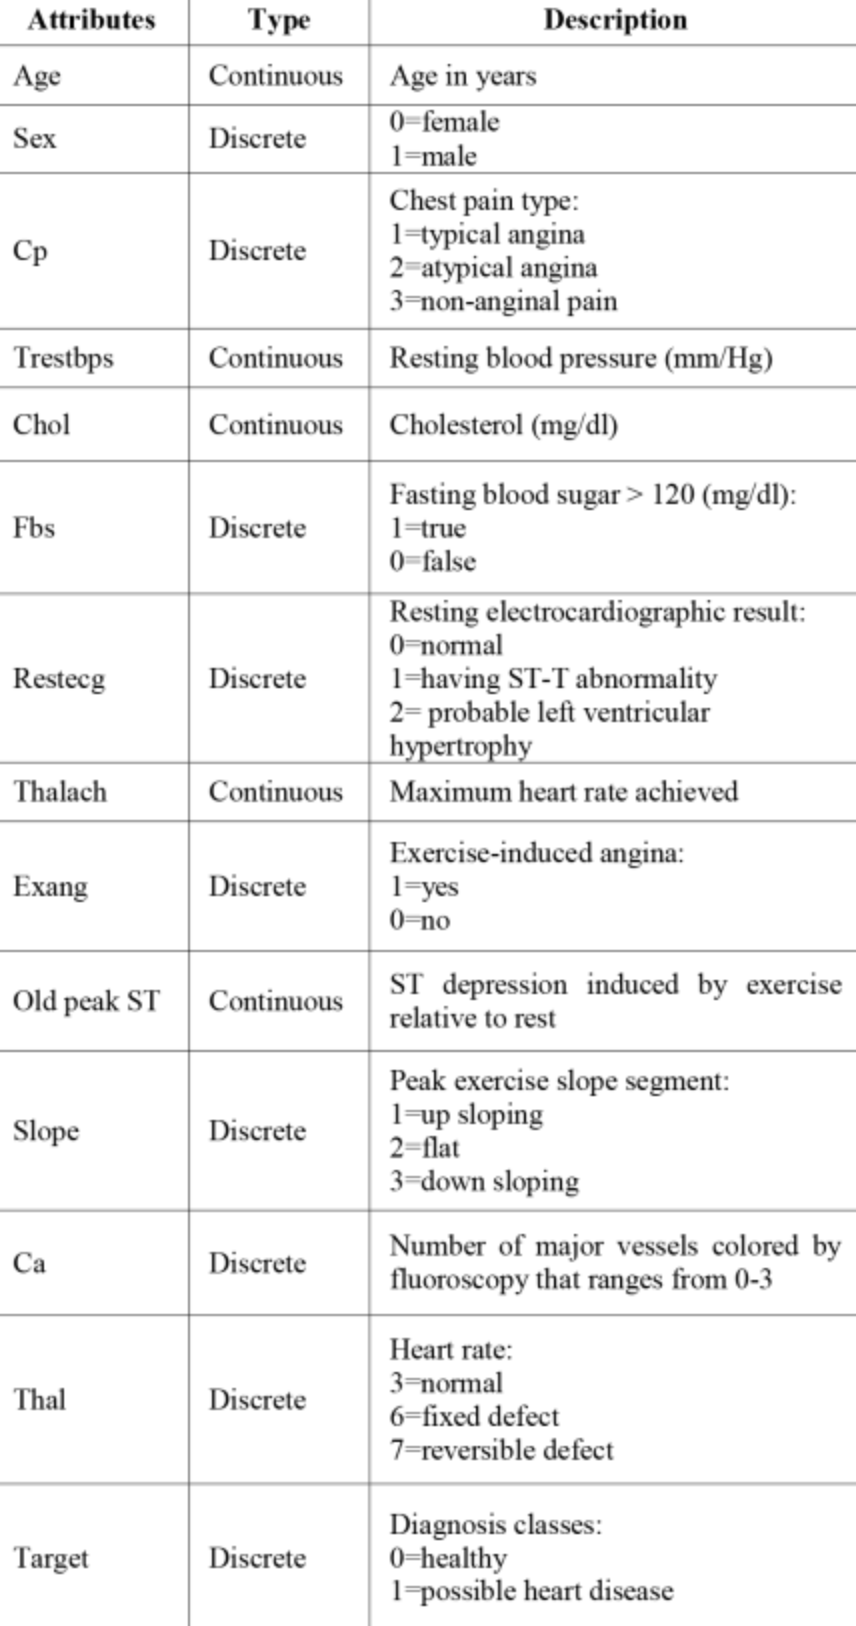

In [1]:
from IPython import display
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/descr.png")

### Importowanie bibliotek

In [2]:
from nn.warstwy import Warstwa

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline


### Importowanie danych

In [3]:
dane = pd.read_csv('../heart.csv')

opis_kolumn={'age':'age',
             'sex':'gender',
             'cp':'chest pain type',
             'trestbps':'resting blood presure',
             'chol': 'cholesterol level',
             'fbs': 'fasting blood sugar',
             'restecg':'resting electrocardiographic results',
             'thalach':'maximum heart rate',
             'exang' : 'exercise including angina',
             'oldpeak':'ST depression',
             'slope':'slope of ST exercise',
             'ca':'number of major vessels',
             'thal':'defect in heart',
             'target': 'disease or not'
            }

dane.head()
dane.info()
dane.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Sprawdzanie, czy występują braki danych

In [4]:
dane.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Statystyka opisowa

In [5]:
dane.describe()
dane.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Możemy zauwazyć, że ten zbiór danych zawiera 303 obserwacje i nie ma w nich braków danych.
Wyróżniamy w nim łącznie 13 features (czynników objaśniających) oraz jedną kolumnę, która
jest targetem, czyli zmienną zero-jedynkową. Zero oznacza brak choroby serca (138 obserwacji), zaś jeden występowanie
choroby serca (165 obserwacji).


Warto również zwrócić uwagę, że skala zmiennych jest zróżnicowana — podczas gdy maksymalna wartość
'age' wynosi 77, maksymalna wartość 'chol' równa się 256.



### Wizualizacja danych
W celu lepszego zrozumienia oraz objaśnienia datasetu wykonamy poniżej wizualizację danych.

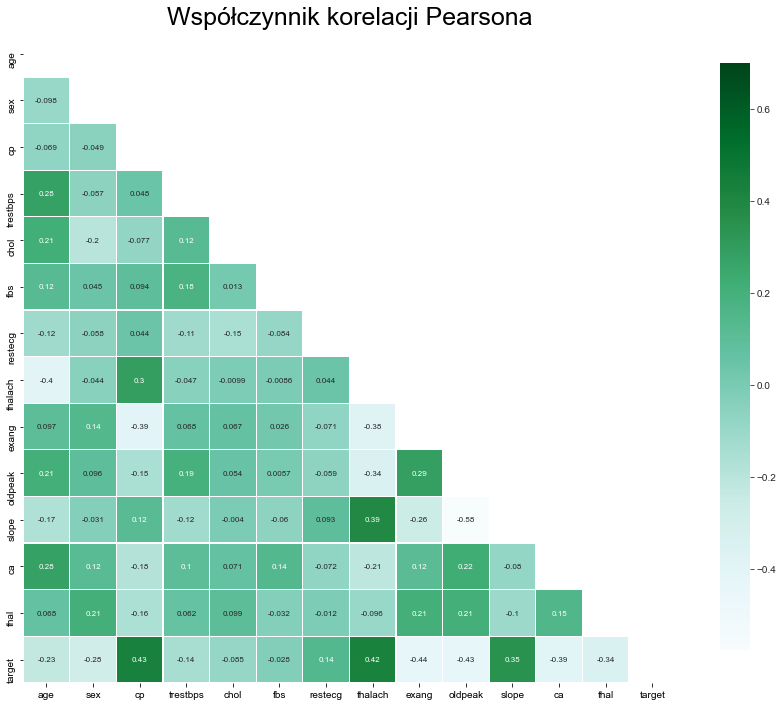

In [6]:
czynniki = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','target']

mask = np.zeros_like(dane[czynniki].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(16, 12))
plt.title('Współczynnik korelacji Pearsona',fontsize=25)

sns.set_style('darkgrid')
sns.heatmap(dane[czynniki].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

Patrząc na powyższą macierz korelacji, łatwo zauważyć, że kilka cech ma ujemną korelację z wartością docelową, podczas gdy inne mają dodatnią.


Zauważamy, że najbardziej skorelowane z targetem są zmienne:
* cp
* thalach
* exang
* oldpeak
* slope
* ca
* tha

Najbardziej skorelowane pomiędzy sobą są zaś zmienne:

* slope - oldpeak
* slope - thalach
* thalach - oldpeak
* thalach - exang
* thalach - age
* exang - cp


Jakie ma to znaczenie dla naszej sieci?

Jak można przeczytać w artykule *"The Precise Effect of Multicollinearity  on Classification Prediction"* [Mary G. Lieberman,
John D. Morris, Florida Atlantic University] wspóliniowość nie jest aż tak bardzo istotna dla problemów klasyfikacyjnych
z użyciem walidacji krzyżowej jak na przykład w przypadku regresji. Według G. Lieberman i J. Morrisa, jeśli celem jest
dokładność prognozowania, to współliniowość nie ma znaczenia. Jeśli, z drugiej strony, meritum naszych badań nie jest skupione wyłącznie
na dokładności przewidywania modelu, a bardziej na znaczeniu zmiennej w modelu, to oczywiście współliniowość może utrudniać rozważania.

Warto zatem zwrócić uwagę, iż zmienne w naszym modelu nie są silnie skorelowane.

Sprawdzamy jaki jest rozkład Y - targetu wśród poszczególnych czynników

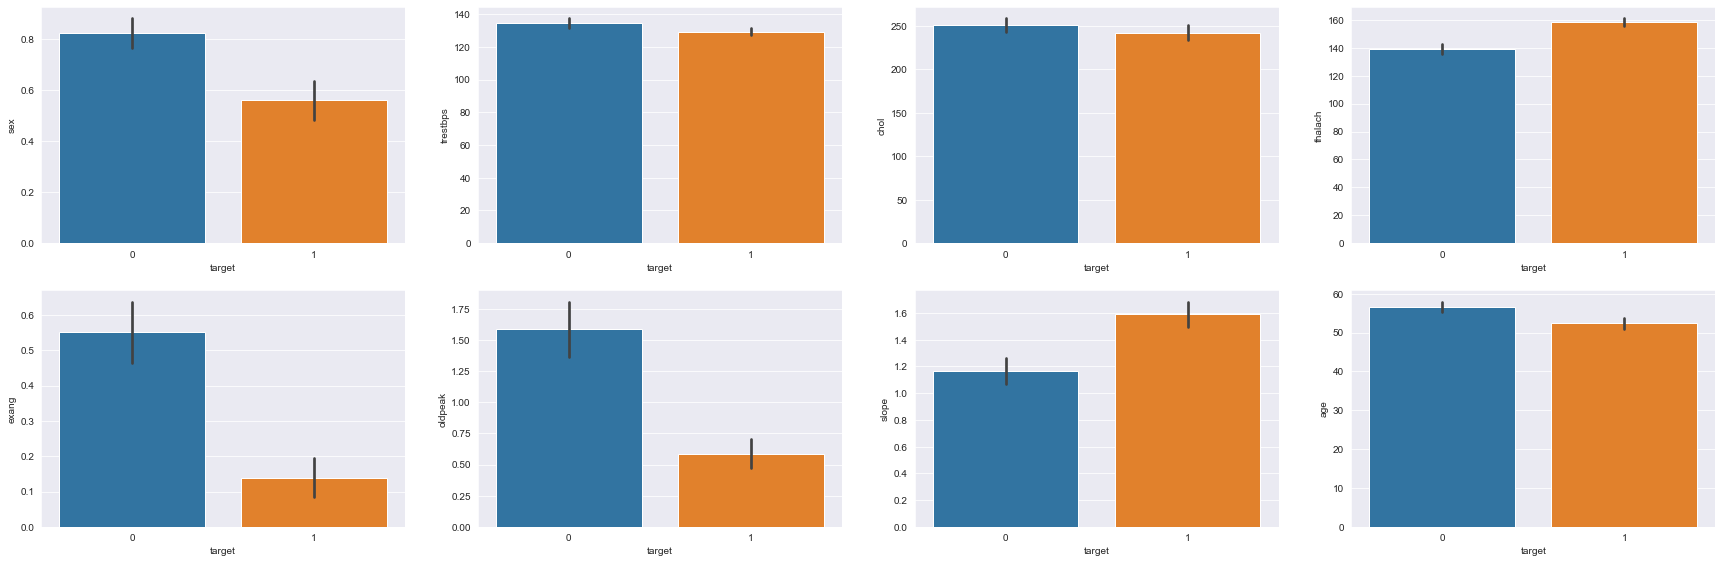

<Figure size 432x288 with 0 Axes>

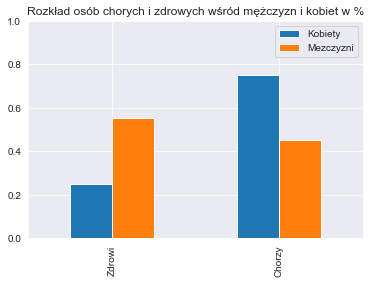

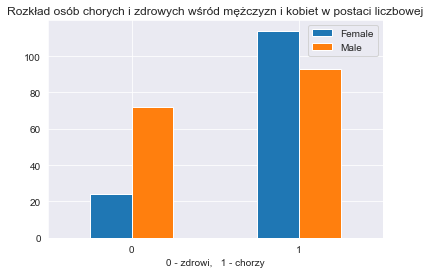

In [7]:
plt.figure(figsize=(30,20))

plt.subplot(4,4,1)
sns.barplot(x = 'target', y = 'sex', data = dane)

plt.subplot(4,4,2)
sns.barplot(x = 'target', y = 'trestbps', data = dane)

plt.subplot(4,4,3)
sns.barplot(x = 'target', y = 'chol', data = dane)


plt.subplot(4,4,4)
sns.barplot(x = 'target', y = 'thalach', data = dane)

plt.subplot(4,4,5)
sns.barplot(x = 'target', y = 'exang', data = dane)

plt.subplot(4,4,6)
sns.barplot(x = 'target', y = 'oldpeak', data = dane)

plt.subplot(4,4,7)
sns.barplot(x = 'target', y = 'slope', data = dane)

plt.subplot(4,4,8)
sns.barplot(x = 'target', y = 'age', data = dane)

#Drugi wykres

ax=plt.figure();
dane_kobiety=dane.loc[dane['sex']==0]
kobiety_chore=len(dane_kobiety.loc[dane_kobiety['target']==1])/len(dane_kobiety)
kobiety_zdrowe=len(dane_kobiety.loc[dane_kobiety['target']==0])/len(dane_kobiety)

dane_mezczyzni=dane.loc[dane['sex']==1]
mezczyzni_chorzy=len(dane_mezczyzni.loc[dane_mezczyzni['target']==1])/len(dane_mezczyzni)
mezczyzni_zdrowi=len(dane_mezczyzni.loc[dane_mezczyzni['target']==0])/len(dane_mezczyzni)

kobiety={'Zdrowi':kobiety_zdrowe, 'Chorzy':kobiety_chore}
mezczyzni={'Zdrowi':mezczyzni_zdrowi, 'Chorzy':mezczyzni_chorzy}
plec_porownanie = pd.DataFrame({'Kobiety':kobiety,'Mezczyzni':mezczyzni})
plec_porownanie.plot.bar(title='Rozkład osób chorych i zdrowych wśród mężczyzn i kobiet w %',ylim=(0,1))

pd.crosstab(dane['sex'],dane['target']).plot(kind='bar',title='Rozkład osób chorych i zdrowych wśród mężczyzn i kobiet w postaci liczbowej');
plt.legend(['Female','Male']);
plt.xlabel("0 - zdrowi,   1 - chorzy");
plt.xticks(rotation=0);

Możemy zauważyć z powyższych wykresów, że więcej kobiet niż mężczyzn zachorowało na choroby
serca.

Histogramy zmiennych:


Text(0.5, 1.0, 'Age Interval')

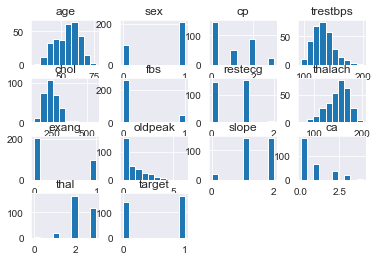

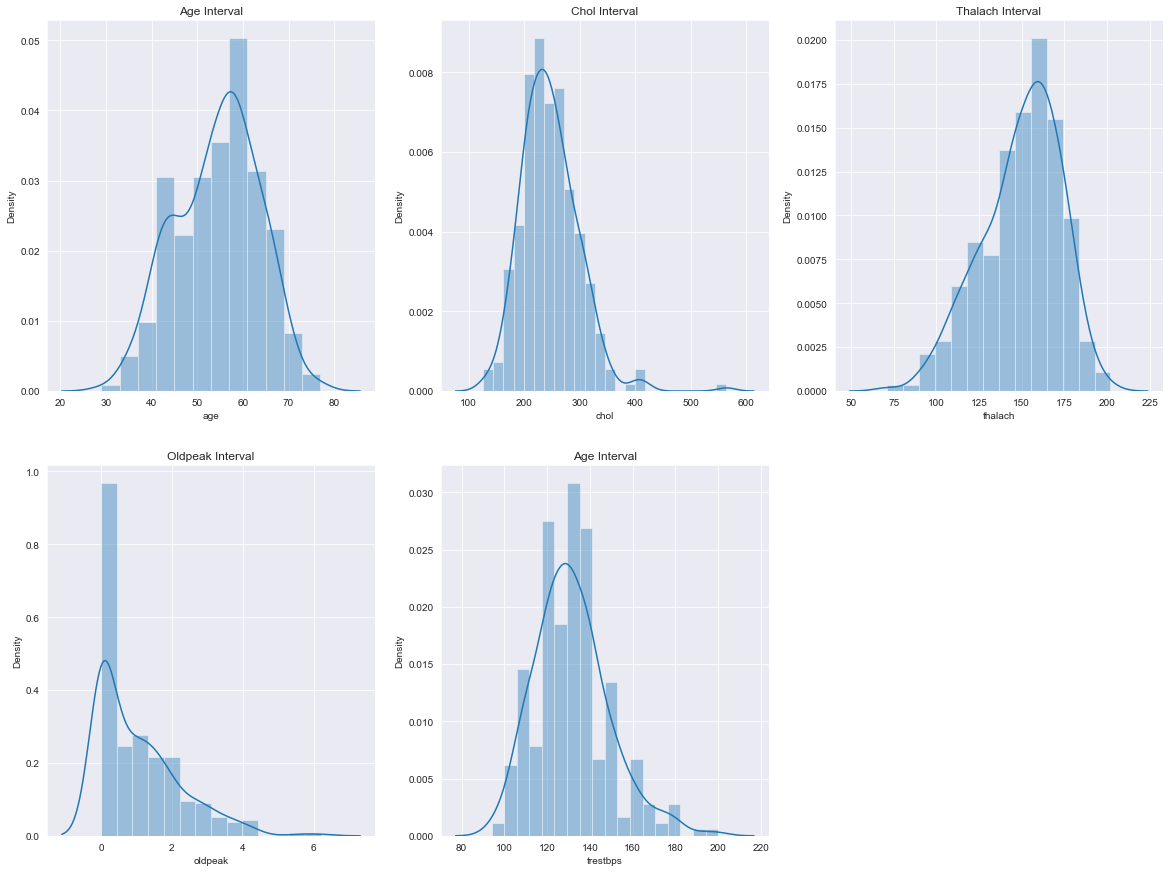

In [8]:
import warnings
warnings.filterwarnings('ignore')
dane.hist()

plt.figure(figsize=(20,15))


plt.subplot(2,3,1)
sns.distplot(dane['age']).set_title('Age Interval')

plt.subplot(2,3,2)
sns.distplot(dane['chol']).set_title('Chol Interval')

plt.subplot(2,3,3)
sns.distplot(dane['thalach']).set_title('Thalach Interval')

plt.subplot(2,3,4)
sns.distplot(dane['oldpeak']).set_title('Oldpeak Interval')

plt.subplot(2,3,5)
sns.distplot(dane['trestbps']).set_title('Age Interval')


Jak możemy zauważyć, wszystkie atrybuty ciągłe (oprócz oldpeak) mają rozkład zbliżony do normalnego.
W przypadku atrybutu age obserwujemy, że większość obserwacji mieści się w przedziale 47–61 lat.

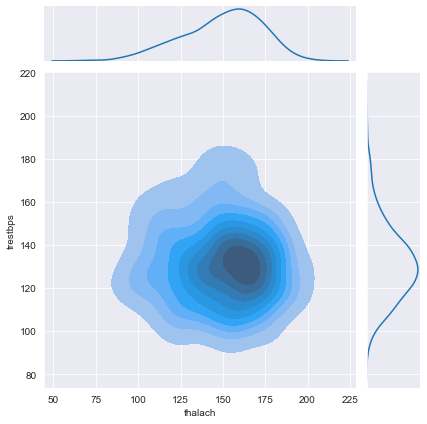

In [9]:
sns.jointplot(kind='kde', x='thalach', y='trestbps', shade = True,  data=dane)

W tym przypadku punkty skupiają się wokół wartości 170 i 130 odpowiednio na osi x i y.

### One hot encoding

Algorytmy uczenia maszynowego nie mogą przetwarzać danych kategorialnych ani tekstowych, chyba że zostały przekonwertowane na liczby.
One hot encoding odwzorowuje wartości kategorialne na wartości całkowite, które są reprezentowane jako wektor binarny, z których wszystkie są wartościami zerowymi, z wyjątkiem indeksu, który jest ustawiony na 1.

In [10]:
from copy import  deepcopy
dane_kopia = deepcopy(dane)
kategorie = ['cp', 'ca', 'slope', 'thal']
for kategoria in kategorie:
    hot_encoded = pd.get_dummies(dane[kategoria], prefix= kategoria)
    dane = pd.concat([dane,hot_encoded],axis=1)
dane = dane.drop(columns=kategorie,axis=1)
dane.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,1,...,0,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,1,...,0,0,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,1,...,0,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,1,...,0,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,1,...,0,0,0,0,0,1,0,0,1,0


### Standaryzacja danych

Normalizacja to przeskalowanie danych z pierwotnego zakresu, tak aby wszystkie wartości mieściły się w pewnym zakresie, zwykle między 0 a 1.
Znormalizowane dane są niezbędne w uczeniu maszynowym.

In [11]:
dane = dane.astype('float32')

dane.dtypes

kategorie = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak','restecg']
for kategoria in kategorie:
    dane[kategoria]= dane[kategoria].apply(lambda x: x-dane[kategoria].min())
    dane[kategoria]= dane[kategoria].apply(lambda x: x/dane[kategoria].max())
dane.describe()


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.544554,...,0.125413,0.066007,0.016502,0.069307,0.462046,0.468647,0.006601,0.059406,0.547855,0.386139
std,0.189210,0.466011,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.498835,...,0.331734,0.248704,0.127605,0.254395,0.499382,0.499842,0.081110,0.236774,0.498528,0.487668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.541667,1.000000,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.666667,1.000000,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
dane.head()


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Model właściwy sieci neuronowej


Import stworzonych przez nas klas:

In [13]:
from nn.fully_connected import WarstwaFC
from nn.funkcje_aktywacji import *
from nn.warstwa_aktywacji import WarstwaAktywacji
from nn.optymalizatory import AdamOptymalizator
from nn.funkcje_celu import MSE, BinaryCrossEntropy
from nn.siec import *
from nn.funkcje_pomocnicze import train_test_split

### Podział na zbiór treningowy i uczący

In [14]:
dane_gotowe = dane.to_numpy()
x_train, y_train, x_test, y_test = train_test_split(dane_gotowe,0.2)

print(x_train.shape,dane_gotowe.shape,y_test.shape)


#x_train = np.expand_dims(x_train, axis=1)
y_train = np.expand_dims(y_train, axis=1)
print(x_train.shape, y_train.shape)
#===============================================================

(242, 25) (303, 26) (61,)
(242, 25) (242, 1)


Warto na tym etapie wspomnieć również o parametrze, występującym w stworzonym przez nas modelu sieci neuronowej - *proc_walidacyjny*,
który odnosi się oczywiście do podziału danych na podzbiór walidacyjny. Pozwolimy sobie zatem krótko nakreślić ideę jego stosowania.

* Grupa walidacyjna jest to taki zbiór danych, który używamy do przeprowadzenia nieobciążonego testu modelu, który przeszkoliliśmy na danych treningowych (uczących).
Test ten przeprowadzamy podczas wyboru modelu albo dobierając zestaw hiperparametrów. Ważnym jest, żeby dane zawarte w zbiorze walidacyjnym nie były używane wcześniej do nauki modelu,
ponieważ nie będą wtedy nadawać się do obiektywnego, nieobciążonego testowania.

Często można się również z nazwą „development set” lub „dev set”. Podkreśla ona, że zestaw danych walidacyjnych służy do testowania wyników podczas doboru modelu czy hiperparametrów na etapie rozwoju wybranego algorytmu.

Poza tym będziemy posługiwać się oczywiście, wspomnianymi powyżej: zbiorem testowym oraz treningowym.

* Grupa ucząca – to taki zestaw danych, który używamy do nauki algorytmu. Na podstawie tych danych model uczy się odpowiednio klasyfikować, buduje wszelkie zależności.

* Grupa testowa – kiedy już wybraliśmy model, wybraliśmy hiperparametry, to nadchodzi czas na przetestowanie wszystkiego danymi z grupy testowej. Jest bardzo ważne, by dane te nie były wcześniej używane do uczenia czy walidacji modelu, ponieważ chcemy wiedzieć, jak wybrany algorytm sprawdza się na danych, z którymi nigdy wcześniej nie miał do czynienia.
Jest używana tylko raz, na samym końcu, kiedy chcemy sprawdzić, jak zadziałały nasze powyżej wspomniane kroki – polegające na uczeniu i walidacji.

Oto jak prezentuje się nasz ANN:



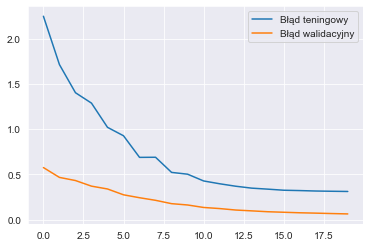

In [15]:
net = Siec()
net.dodaj_warstwe(WarstwaFC(25, 64, optymalizator=AdamOptymalizator()))
net.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))
net.dodaj_warstwe(WarstwaFC(64, 64, optymalizator=AdamOptymalizator()))
net.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))
net.dodaj_warstwe(WarstwaFC(64, 1, optymalizator=AdamOptymalizator()))
net.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))

m = MSE()
bin_cross_entropy = BinaryCrossEntropy()

# train
net.ust_f_celu(bin_cross_entropy.funk, bin_cross_entropy.derr)
historia = net.trenuj(x_train, y_train,
                      iteracje=20,
                      lrn_rate=0.01,
                      proc_walidacyjny=0.2,
                      batch_size= 32)

# test
out = net.predykcja(x_train)
import matplotlib.pyplot as plt
plt.plot(historia['blad_trening'], scaley = True)
plt.plot(historia['blad_walidacji'], scaley = True)
plt.legend(['Błąd teningowy', 'Błąd walidacyjny'])
#plt.ylim([0,1.5])
plt.show()


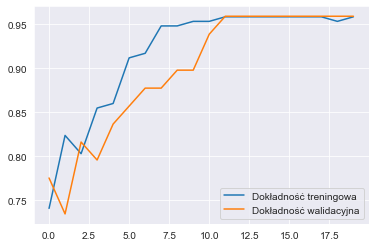

(61, 1, 1)

In [16]:
plt.plot(historia['dokładnosc_treningowa'], scaley = True)
plt.plot(historia['dokładnosc_walidacji'], scaley = True)
plt.legend(['Dokładność treningowa', 'Dokładność walidacyjna'])
#plt.ylim([0,1.5])
plt.show()
np.array(net.predykcja(x_test)).shape

In [17]:
x_test.shape
accuracy(y_test,net.predykcja(x_test))


0.9836065573770492

Jak możemy zauważyć accuracy stworzonego przez nas modelu wynosi 98.36%.
Accuracy, czy inaczej mówiąc dokładność, to jedna z miar służących do oceny modeli klasyfikacyjnych. Nieformalnie, dokładność to procent poprawnie przewidzianych przez model prognoz.
Formalnie ma ona następującą definicję:

$ Accuracy = \frac{\text{poprawne predykcje}}{\text{liczba wszystkich predykcji}} $


Błąd naszego modelu wynosi natomiast mniej niż 0.05.

Przedstawione powyżej wyniki możemy uznać za względnie satysfakcjonujące. Warto jednakże wspomnieć o tym, czemu je zawdzięczamy
oraz jakie konkretnie paramtery zostały przez nas wykorzystane. Poniżej prezentujemy zatem zwięzłą specyfikację sieci, a jej poszczególne parametry
omówimy w części porównawczej.

**Parametry ANN:**
* liczba warstw: 3
* liczba neuronów dla poszczególnych warstw (po kolei): 25-64; 64-64; 64-1
* funkcja aktywacji: sigmoid
* funkcja błędu: binary cross entropy (entropia krzyżowa)
* optymalizatory: Adam (dla learning rate), SGD (stochastic gradient descent)
* sprawdzanie modelu: podział na zbiór treningowy i walidacyjny oraz testowy

W kolejnych krokach omówimy wpływ poszczególnych parametrów oraz ich znaczenie dla wyników i dokładności naszej sieci neuronowej.



## Analiza wpływu wybranych czynników na dokładność sieci neuronowej

### Analiza dokładności sieci w zależności od ilości warstw

Chociaż liczba ukrytych warstw i liczba neuronów na warstwę są kluczowe dla modeli uczenia maszynowego, nie ma ogólnej
zasady ich określania w celu uzyskania najlepszej wydajności. Zwykle jest to metoda heurystyczna i może mieć na nią wpływ wiele czynników,
takich jak liczba danych treningowych i zastosowane funkcje.

Co prawda trudno powiedzieć, aby naszą metodę doboru można było nazwać heurystyczną -
jednak z pewnością bazuje ona na empirycznych spostrzeżeniach.


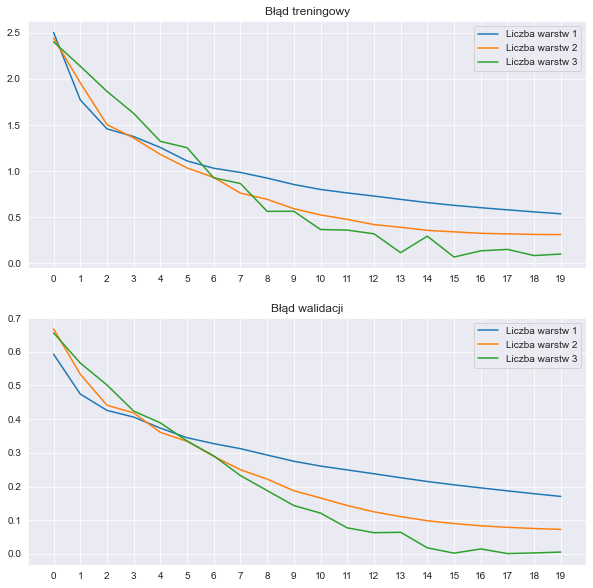

In [18]:
iteracje = 20
historie_l_warstw = []
for l_warstw in [1,2,3]:
    net1 = Siec()
    net1.dodaj_warstwe(WarstwaFC(25, 64, optymalizator=AdamOptymalizator()))
    net1.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))
    for i in range(l_warstw-1):
        net1.dodaj_warstwe(WarstwaFC(64, 64, optymalizator=AdamOptymalizator()))
        net1.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))

    net1.dodaj_warstwe(WarstwaFC(64, 1, optymalizator=AdamOptymalizator()))
    net1.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))

    bin_cross_entropy = BinaryCrossEntropy()
    net1.ust_f_celu(bin_cross_entropy.funk,bin_cross_entropy.derr)

    historia1 = net1.trenuj(x_train, y_train,
                            iteracje=iteracje,
                            lrn_rate=0.01,
                            proc_walidacyjny=0.2,
                            batch_size=32)
    historie_l_warstw.append(historia1)
    del net1
# plt.plot(historia1['blad_trening'], scaley=True)
# plt.plot(historia1['blad_walidacji'], scaley = True)
# plt.legend(['Błąd teningowy', 'Błąd walidacyjny'])
#
fig,ax = plt.subplots(2,1, figsize =(10,10))
przypadki = []
xticks = [i for i in range(iteracje)]
for i, przypadek in enumerate(historie_l_warstw):
    ax[0].plot(przypadek['blad_trening'])
    ax[1].plot(przypadek['blad_walidacji'])
    przypadki.append(f'Liczba warstw {i+1}')
ax[0].legend(przypadki)
ax[0].set_title("Błąd treningowy")
ax[1].legend(przypadki)
ax[1].set_title("Błąd walidacji")
ax[0].set_xticks(xticks);
ax[1].set_xticks(xticks);

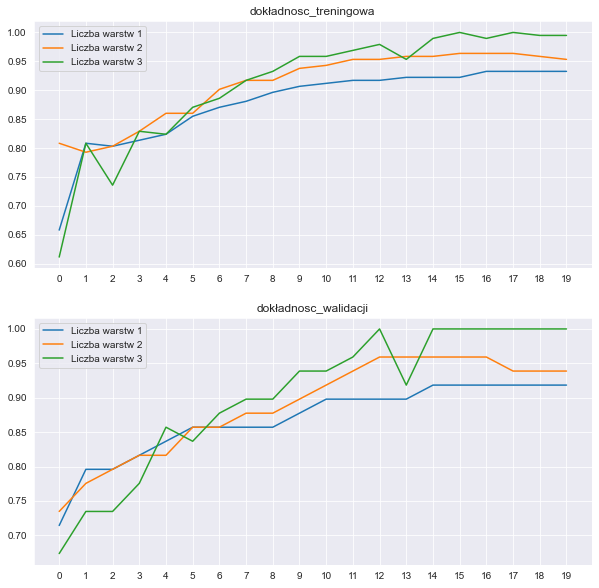

In [19]:
fig,ax = plt.subplots(2,1, figsize =(10,10))

for i, przypadek in enumerate(historie_l_warstw):
    ax[0].plot(przypadek['dokładnosc_treningowa'])
    ax[1].plot(przypadek['dokładnosc_walidacji'])
    przypadki.append(f'Liczba warstw {i+1}')
ax[0].legend(przypadki)
ax[0].set_title('dokładnosc_treningowa')
ax[1].legend(przypadki)
ax[1].set_title('dokładnosc_walidacji')
ax[0].set_xticks(xticks);
ax[1].set_xticks(xticks);

W naszym przypadku najlepiej sprawdziła się liczba warstw równa 3.

### Analiza dokładności sieci w zależności od występowania optymalizatora learning rate

Jak wspominaliśmy na początku, mini-batch gradient descent to nie jedyny optymalizator, który
został zastosowany w naszym modelu. Kolejnym z nich jest optymalizator learning rate, znany jako
Adaptive Moment Estimation (Adam), którego ideę postaramy się przedstawić poniżej.

Adam został po raz pierwszy zaprezentowany przez Diederika Kingmę z OpenAI i Jimmy'ego Ba z University of Toronto w artykule ICLR
z 2015 roku zatytułowanym „Adam: A Method for Stochastic Optimization”.

Przedstawiając algorytm, autorzy wymienili wiele korzyści, wynikających z jego zastosowania - my przytoczymy jedynie parę z nich:

* Prostota wdrożenia.
* Wydajność obliczeniowa.
* Małe wymagania dotyczące pamięci.
* Dobrze nadaje się do problemów, które są duże pod względem danych i / lub parametrów.
* Odpowiedni do problemów z tzw. "wybuchającymi"  gradientami.
* Hiperparametry mają intuicyjną interpretację i zwykle wymagają niewielkiej korekty.

Adam różni się od klasycznego SGD. Stochastic Gradient Descent utrzymuje jeden współczynnik uczenia się (learning rate)
dla wszystkich aktualizacji wagi i nie zmienia się on podczas treningu. W Adamie natomiast obliczane są
indywidualne współczynniki adaptacyjnego uczenia się dla różnych parametrów. Jego nazwa wywodzi się od Adaptive Moment Estimation,
a powód, dla którego tak się nazywa, jest taki, że Adam używa oszacowań pierwszego i drugiego momentu gradientu, aby dostosować szybkość uczenia się dla każdej wagi sieci neuronowej.
Co to jest moment? N-ty moment zmiennej losowej definiuje się jako wartość oczekiwaną tej zmiennej do potęgi n. Bardziej formalnie:

![](https://miro.medium.com/max/288/1*NIM9yxfs4PciZ_A7w-n0-w.png)

Należy zauważyć, że gradient funkcji kosztu sieci neuronowej można uznać za zmienną losową, ponieważ zwykle ocenia się go na małej, losowej porcji danych.
Pierwszy moment to średnia, a drugi to tzw. uncentered variance - co oznacza, że nie odejmujemy średniej podczas obliczania wariancji.
W dalszej części pokażemy, jak wykorzystujemy te wartości, teraz musimy jednak zdecydować, jak je w ogóle zdobyć.

Aby oszacować momenty, Adam wykorzystuje wykładnicze średnie ruchome, obliczone na gradiencie oszacowanym na bieżącym mini-batchu:

![](https://miro.medium.com/max/886/1*ZhGLUwaaqlJ9C0WK0nbAEA.png)

Gdzie m i v są średnimi ruchomymi, g jest gradientem na bieżącym mini-batchu, a beta - nowo wprowadzonymi hiperparametrami algorytmu.
Parametry beta mają naprawdę dobre wartości domyślne wynoszące odpowiednio 0,9 i 0,999 i z tego, co udało nam się dowiedzieć - prawie
nikt nigdy nie zmienia tych wartości. Wektory średnich ruchomych są inicjowane zerami w pierwszej iteracji.

Aby zobaczyć, jak te wartości korelują z momentem zdefiniowanym w pierwszym równaniu, przyjrzyjmy się wartościom oczekiwanym naszych średnich ruchomych.
Ponieważ m i v są estymatorami pierwszego i drugiego momentu, chcemy uzyskać następującą własność:

![](https://miro.medium.com/max/432/1*uoUrVBHcgpdfbB4stoNgYA.png)

Wartości oczekiwane estymatorów powinny być równe parametrowi, który próbujemy oszacować - a tak się składa, że
parametr w naszym przypadku jest również wartością oczekiwaną. Gdyby te własności były prawdziwe, oznaczałoby to, że
mamy estymatory nieobciążone. Jak jednak zaraz pokażemy, nie jest to prawda dla średnich ruchomych.
Ponieważ wartości średnie inicjalizujemy zerami, estymator jest obciążony i jego obciążenie dąży do zera. Udowodnimy to dla m (dowód na v byłby analogiczny),
obliczając m dla pierwszych gradientów. Poniżej rozwiniemy kilka wartości m, aby zobaczyć regułę, którą wykorzystamy w dalszym kroku:

![](https://miro.medium.com/max/1400/1*ztYpt5ppDEE7lW8LqxMShw.png)

Jak widać, im „dalej” zwiększamy wartość m, w tym mniejszym stopniu pierwsze wartości gradientów wpływają na ogólną
wartość, ponieważ są one mnożone przez coraz mniejsze współczynniki beta. Zauważając tę zależność, możemy zapisać wzór na naszą średnią ruchomą:

![](https://miro.medium.com/max/770/1*5Q1ZlbpP-C4wzJVtVfGn5Q.png)


Teraz przyjrzymy się wartości oczekiwanej m, abyśmy mogli zobaczyć, jak ma się ona do prawdziwego pierwszego momentu i skorygować ich rozbieżność:

![](https://miro.medium.com/max/1036/1*_uSts1p9vJ5yat3iTHR5Ug.png)

Jak możemy zauważyć, w wyniku przekształceń matematytcznych we wzorze pojawił się błąd C.
W tym równaniu powinniśmy zatem zwrócić uwagę na dwie rzeczy:
* Dowiedliśmy, że estymator jest obciążony. Dotyczy to nie tylko Adama, ale także algorytmów wykorzystujących średnie kroczące (SGD z momentum, RMSprop itp.).
* Nie odniesie on dużego skutku (chyba że jest to początek treningu), ponieważ wartość beta do potęgi t szybko zbliża się do zera.
Musimy więc skorygować estymator, aby oczekiwana wartość była tą, której chcemy. Ten krok jest zwykle określany jako korekta odchylenia.
Ostateczne wzory naszego estymatora będą wyglądały następująco:

![](https://miro.medium.com/max/390/1*M86IUMsrHXq4WrS-Bk5boA.png)

Jedyne, co pozostaje do zrobienia, to wykorzystanie tych średnich ruchomych do skalowania learning rate indywidualnie dla każdego parametru.
Sposób, w jaki to się robi w Adamie jest bardzo prosty. Aby zaktualizować wagę, wykonujemy następujące czynności:

![](https://miro.medium.com/max/720/1*WrfK1bWzKYEH-UdsBHYl5A.png)

Gdzie w to wagi modelu, eta (wygląda jak litera n) to rozmiar kroku. I to wszystko.
Teraz skupimy się na meritum, do którego zmierzać miały nasze wyjaśnienia: czy nasz model jest "beneficjentem"
Adama?

Na poniższych wykresach zestawimy ze sobą dwa takie same modele, które różni wyłącznie obecność optymalizatora.

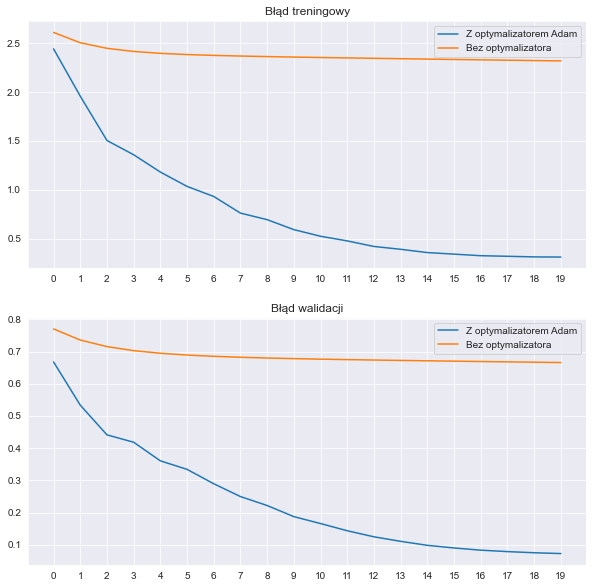

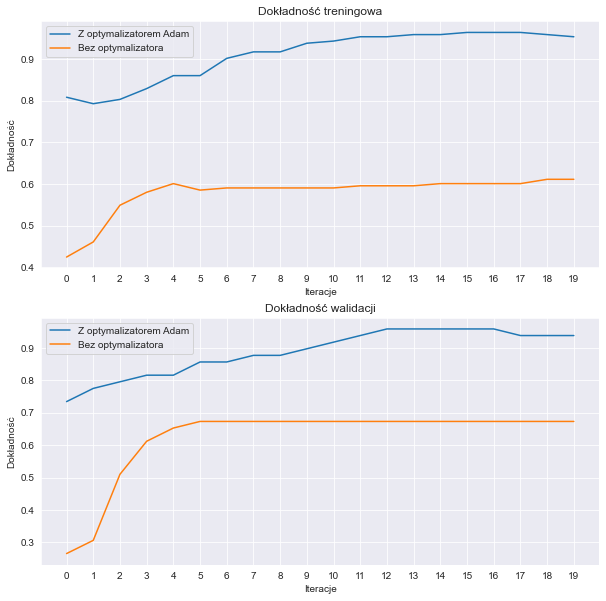

In [20]:
iteracje = 20
historie_optymalizator = []
for opt in ['Adam', None]:
    net1 = Siec()
    if opt == 'Adam':
        net1.dodaj_warstwe(WarstwaFC(25, 64, AdamOptymalizator()))
    else:
         net1.dodaj_warstwe(WarstwaFC(25, 64, None))
    net1.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))

    if opt == 'Adam':
        net1.dodaj_warstwe(WarstwaFC(64, 64, AdamOptymalizator()))
    else:
         net1.dodaj_warstwe(WarstwaFC(64, 64, None))
    net1.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))

    if opt == 'Adam':
        net1.dodaj_warstwe(WarstwaFC(64, 1, AdamOptymalizator()))
    else:
         net1.dodaj_warstwe(WarstwaFC(64, 1, None))
    net1.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))

    bin_cross_entropy = BinaryCrossEntropy()
    net1.ust_f_celu(bin_cross_entropy.funk,bin_cross_entropy.derr)

    historia1 = net1.trenuj(x_train, y_train,
                            iteracje=iteracje,
                            lrn_rate=0.01,
                            proc_walidacyjny=0.2,
                            batch_size=32)
    historie_optymalizator.append(historia1)
    del net1 #usuwanie obiektu z pamięci
# plt.plot(historia1['blad_trening'], scaley=True)
# plt.plot(historia1['blad_walidacji'], scaley = True)
# plt.legend(['Błąd teningowy', 'Błąd walidacyjny'])
#
fig,ax = plt.subplots(2,1, figsize =(10,10))
przypadki = ["Z optymalizatorem Adam", "Bez optymalizatora"]
xticks = [i for i in range(iteracje)]
for i, przypadek in enumerate(historie_optymalizator):
    ax[0].plot(przypadek['blad_trening'])
    ax[1].plot(przypadek['blad_walidacji'])

ax[0].legend(przypadki)
ax[0].set_title("Błąd treningowy")
ax[1].legend(przypadki)
ax[1].set_title("Błąd walidacji")
ax[0].set_xticks(xticks);
ax[1].set_xticks(xticks);

fig1,ax1 = plt.subplots(2,1, figsize =(10,10))

for i, przypadek in enumerate(historie_optymalizator):
    ax1[0].plot(przypadek['dokładnosc_treningowa'])
    ax1[1].plot(przypadek['dokładnosc_walidacji'])

ax1[0].legend(przypadki)
ax1[0].set_title('Dokładność treningowa')
ax1[1].legend(przypadki)
ax1[1].set_title('Dokładność walidacji')
ax1[0].set_xticks(xticks);
ax1[1].set_xticks(xticks);
ax1[1].set_xlabel("Iteracje");
ax1[1].set_ylabel("Dokładność");
ax1[0].set_xlabel("Iteracje");
ax1[0].set_ylabel("Dokładność");

Jak możemy zauważyć sieć, w której został zastosowany Adam wypada znacznie lepiej niż ta bez optymalizatora.
Różnice są znaczne, gdyż w przypadku dokładności treningowej mamy do czynienia z około 98% w przypadku Adama i niecałym
70% bez zastosowania optymalizatora.

### Analiza dokładności sieci w zależności od ilość neuronów

Liczba neuronów użytych w warstwach ukrytych została uzyskana poprzez eksperymenty, mające na celu określenie jak najlepszej
zdolności predykcyjnej modelu.

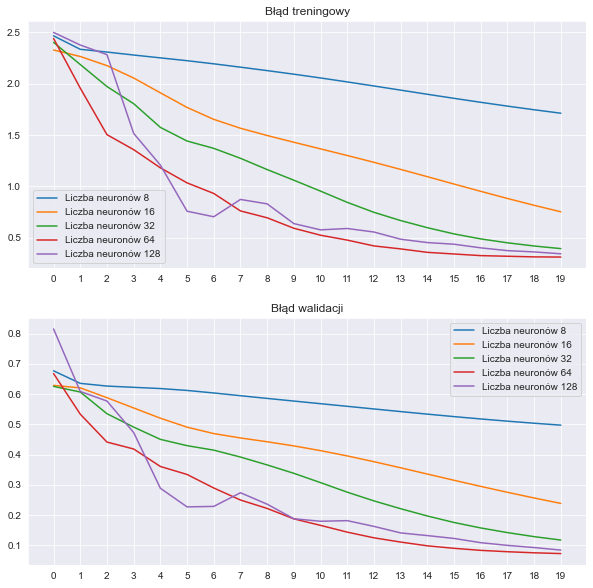

In [21]:
iteracje = 20
historie_l_neuronow = []
testowe_liczby_neuronow = [8,16,32,64,128]
for l_neuronow in testowe_liczby_neuronow:
    net1 = Siec()
    net1.dodaj_warstwe(WarstwaFC(25, l_neuronow, AdamOptymalizator()))
    net1.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))
   
    net1.dodaj_warstwe(WarstwaFC(l_neuronow, l_neuronow,AdamOptymalizator()))
    net1.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))

    net1.dodaj_warstwe(WarstwaFC(l_neuronow, 1, AdamOptymalizator()))
    net1.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))

    bin_cross_entropy = BinaryCrossEntropy()
    net1.ust_f_celu(bin_cross_entropy.funk,bin_cross_entropy.derr)

    historia1 = net1.trenuj(x_train, y_train,
                            iteracje=iteracje,
                            lrn_rate=0.01,
                            proc_walidacyjny=0.2,
                            batch_size=32)
    historie_l_neuronow.append(historia1)
    del net1

fig,ax = plt.subplots(2,1, figsize =(10,10))
przypadki = []
xticks = [i for i in range(iteracje)]
for  (przypadek,i) in zip(historie_l_neuronow,testowe_liczby_neuronow):
    ax[0].plot(przypadek['blad_trening'])
    ax[1].plot(przypadek['blad_walidacji'])
    przypadki.append(f'Liczba neuronów {i}')
ax[0].legend(przypadki)
ax[0].set_title("Błąd treningowy")
ax[1].legend(przypadki)
ax[1].set_title("Błąd walidacji")
ax[0].set_xticks(xticks);
ax[1].set_xticks(xticks);

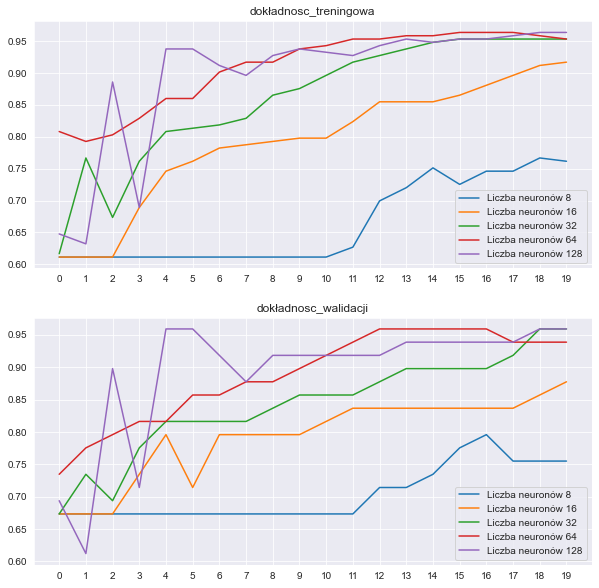

In [22]:
fig,ax = plt.subplots(2,1, figsize =(10,10))

for  (przypadek,i) in zip(historie_l_neuronow,testowe_liczby_neuronow):
    ax[0].plot(przypadek['dokładnosc_treningowa'])
    ax[1].plot(przypadek['dokładnosc_walidacji'])
    przypadki.append(f'Liczba neuronów {i+1}')
ax[0].legend(przypadki)
ax[0].set_title('dokładnosc_treningowa')
ax[1].legend(przypadki)
ax[1].set_title('dokładnosc_walidacji')
ax[0].set_xticks(xticks);
ax[1].set_xticks(xticks);

Jak możemy zauważyć mała liczba neuronów nie najlepiej odwzorowuje zależności w naszym modelu. Może to wynikać
z faktu, że wykorzystany przez nas surowy dataset posiada 13 cech (25 zmiennych po one hot encoding) i każda z nich
powinna mieć (naszym zdaniem) pełną reprezentację neuronów. Empirycznie najlepiej sprawdziła się ilosć
neuronów równa 64 lub 128. W naszym modelu postanowiliśmy wykorzystać zatem 64 neurony w warstwie ukrytej.

### Analiza dokładności sieci w zależności od funkcji błędu

Zanim zaczniemy porównanie wyników z wykorzystaniem poszczególnych funkcji błędu - Cross Entropy oraz MSE -
postaramy się poniżej przedstawić nieco więcej informacji na temat pierwszej z nich.

Binary crossentropy to funkcja błędu, która jest (z dużym powodzeniem) używana w zadaniach klasyfikacji binarnej.
Są to zadania odpowiadające na pytanie z tylko dwoma możliwościami (tak lub nie, A lub B, 0 lub 1, lewo lub prawo czy jak
w naszym przypadku: chory lub zdrowy).

![](https://peltarion.com/static/binary_crossentropy_setup.svg)

Cross entropy oblicza błąd danego przykładu poprzez następującą średnią:

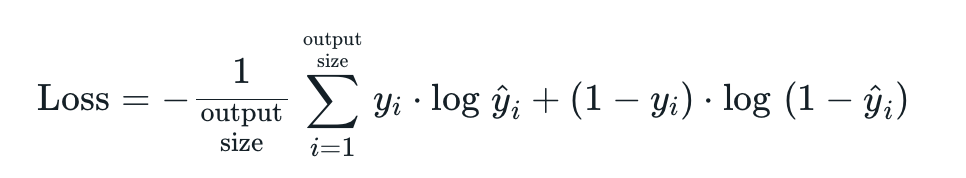

In [23]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/log loss.png")

gdzie y z daszkiem to i-ty skalar outputu, y to odpowiadająca mu wartość targetu, a output  size to liczba wartości skalarnych w outpucie modelu.


Warto dodać, że zazwyczaj stosowanymi funkcjami aktywacji przy zastosowaniu entropii krzyżowej do obliczania błędu są: sigmoid (w naszym przypadku zdecydowaliśmy się na użycie właśnie tej funkcji)
lub softmax - ponieważ cross entropy mierzy wydajność modelu klasyfikacyjnego, którego wynikiem jest wartość prawdopodobieństwa z zakresu od 0 do 1.
Błąd entropii krzyżowej rośnie, gdy przewidywane prawdopodobieństwo odbiega od rzeczywistej etykiety. Zatem przewidywanie prawdopodobieństwa 0,012,
gdy rzeczywista etykieta obserwacji wynosi 1 skutkowałoby wysoką wartością straty.

![](https://ml-cheatsheet.readthedocs.io/en/latest/_images/cross_entropy.png)

Powyższy wykres przedstawia zakres możliwych wartości błędu przy prawdziwej obserwacji (np. CzyZdrowy = 1).
Gdy przewidywane prawdopodobieństwo zbliża się do 1, błąd powoli maleje. Jednak wraz ze spadkiem przewidywanego prawdopodobieństwa
strata logarytmu gwałtownie rośnie. Log loss "kara" zatem szczególnie te predykcje, które są błędne.

Co więcej, z publikacji naukowych wynika, że sigmoid + mse zbiega wolniej w porównaniu z sigmoidem + entropią krzyżową ze względu na problem z zanikaniem gradientu.
Przeczytać o tym można między innymi w publikacji *"Cross-Entropy vs. Squared Error Training: a Theoretical and Experimental Comparison"*
[Pavel Golik, Patrick Doetsch, Hermann Ney,Aachen University].

Poniżej sprawdzimy jak te teoretyczne założenia sprawdzają się na naszym zagadnieniu klasyfikacyjnym.

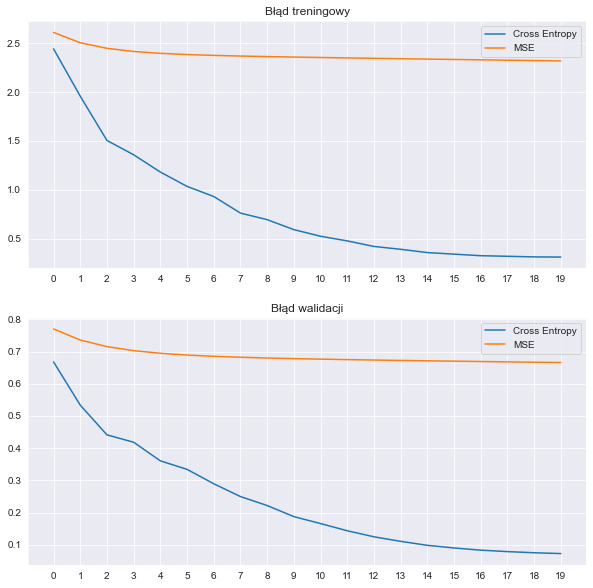

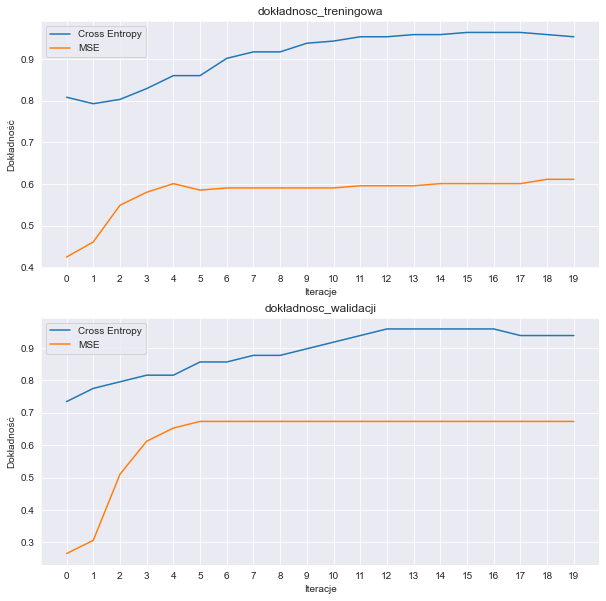

In [24]:


iteracje = 20
historie_f_loss = []
l_neuronow = 64
for loss in ['CrossEntropy','MSE']:
    net1 = Siec()
    net1.dodaj_warstwe(WarstwaFC(25, l_neuronow, AdamOptymalizator()))
    net1.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))

    net1.dodaj_warstwe(WarstwaFC(l_neuronow, l_neuronow,AdamOptymalizator()))
    net1.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))

    net1.dodaj_warstwe(WarstwaFC(l_neuronow, 1, AdamOptymalizator()))
    net1.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))
    if loss == 'CrossEntropy':
        f_loss  =  BinaryCrossEntropy()
    else :
        f_loss  = MSE()
    net1.ust_f_celu(f_loss.funk,f_loss.derr)

    historia1 = net1.trenuj(x_train, y_train,
                            iteracje=iteracje,
                            lrn_rate=0.01,
                            proc_walidacyjny=0.2,
                            batch_size=32)
    historie_f_loss.append(historia1)
    del net1

fig,ax = plt.subplots(2,1, figsize =(10,10))
przypadki = ["Cross Entropy", "MSE"]
xticks = [i for i in range(iteracje)]
for i, przypadek in enumerate(historie_optymalizator):
    ax[0].plot(przypadek['blad_trening'])
    ax[1].plot(przypadek['blad_walidacji'])

ax[0].legend(przypadki)
ax[0].set_title("Błąd treningowy")
ax[1].legend(przypadki)
ax[1].set_title("Błąd walidacji")
ax[0].set_xticks(xticks);
ax[1].set_xticks(xticks);

fig1,ax1 = plt.subplots(2,1, figsize =(10,10))

for i, przypadek in enumerate(historie_optymalizator):
    ax1[0].plot(przypadek['dokładnosc_treningowa'])
    ax1[1].plot(przypadek['dokładnosc_walidacji'])

ax1[0].legend(przypadki)
ax1[0].set_title('dokładnosc_treningowa')
ax1[1].legend(przypadki)
ax1[1].set_title('dokładnosc_walidacji')
ax1[0].set_xticks(xticks);
ax1[1].set_xticks(xticks);
ax1[1].set_xlabel("Iteracje");
ax1[1].set_ylabel("Dokładność");
ax1[0].set_xlabel("Iteracje");
ax1[0].set_ylabel("Dokładność");

Jak możemy zauważyć nasze przypuszczenia były słuszne - zastosowanie entropii krzyżowej przynosi dużo lepsze rezultaty
niż zastosowanie funkcji MSE. W przypadku dokładności predykcji na zbiorze treningowym różnica między nimi wynosi ponad 30% accuracy.

Jak wspomnieliśmy, takie rezultaty mogą wynikać z kilku przyczyn. Po pierwsze, cross entropy
jest lepszą miarą niż MSE do klasyfikacji, ponieważ granica decyzyjna w zadaniu klasyfikacyjnym jest duża (w porównaniu z regresją).
MSE nie "penalizuje" wystarczająco błędnych klasyfikacji, ale za to jest właściwą funkcją błędu w przypadku regresji, gdzie odległość między dwiema wartościami, które można przewidzieć, jest niewielka.

Po drugie, z probabilistycznego punktu widzenia, entropia krzyżowa to oczywista funkcja kosztu, w przypadku, jeśli w warstwie wyjściowej sieci występuje nieliniowość sigmoidalna (lub softmax) i chcemy
zmaksymalizować prawdopodobieństwo prawidłowego sklasyfikowania danych wejściowych.
Do klasyfikacji entropia krzyżowa wydaje się być bardziej odpowiednia niż MSE - podstawowe założenia po prostu mają więcej sensu dla tej "konfiguracji".
Mówiąc to, mamy na myśli, że oczywiście można wyszkolić klasyfikator z funkcją błędu MSE i prawdopodobnie będzie działał dobrze, jednak jak widzimy -
nie aż tak dobrze, jak ma to miejsce w przypadku cross entropy. W celu poprawy wyników MSE
lepszym pomysłem na funkcję aktywacji byłaby prawdopodobnie funkcja liniowa.

Konkludując - cross entropy świetnie sprawdza się w rozwiązywaniu problemów klasyfikacyjnych -czyli właśnie tak jak ma to miejsce w przypadku naszego zagadnienia.
W przypadku problemów regresyjnych lepszym wyborem powinno być MSE.

### Analiza dokładności sieci w zależności od liczby iteracji

Epoka - nazywana w naszej sieci *iteracją* oznacza uczenie sieci neuronowej ze wszystkimi danymi treningowymi przez jeden cykl.
W epoce używamy wszystkie dane dokładnie raz. Forward propagation i backpropagation liczone są łącznie jako jedno "przejście":

![](https://www.baeldung.com/wp-content/uploads/sites/4/2020/12/epoch-fwd-bwd-pass.png)

Epoka składa się z co najmniej jednego batcha, gdzie używamy części zbioru danych do uczenia sieci neuronowej. Przejście przez przykłady treningowe w batchu nazywamy iteracją.

Czasami nazwa epoka jest używana wymiennie z "iteracją". Aby jednak w pełni wyjaśnić pojęcia, rozważymy
prosty przykład, w którym mamy 1000 punktów danych, jak pokazano na poniższym rysunku:

![](https://www.baeldung.com/wp-content/uploads/sites/4/2020/12/epoch-batch-size.png)

Jeśli rozmiar batcha wynosi 1000, możemy zakończyć epokę pojedynczą iteracją. Podobnie, jeśli rozmiar batcha wynosi 500, epoka wymaga dwóch iteracji. Tak więc, jeśli rozmiar batcha
wynosi 100, ukończenie epoki zajmuje 10 iteracji.

Wracając jednak do meritum - podjęcie decyzji o architekturze sieci neuronowej to duży krok w budowie modelu.
Musimy w końcu wytrenować model i dostroić po drodze więcej hiperparametrów.

Na etapie treningu dążymy do zminimalizowania błędu, a także upewnienia się, że model dobrze uogólnia nowe dane.
Kompromis między obciążeniem a wariancją jest nadal potencjalną pułapką, której chcemy uniknąć, podobnie jak w przypadku
innych nadzorowanych algorytmów uczenia maszynowego.

Z tzw. overfittingiem, czyli nadmiernym dopasowaniem (duża wariancja) mamy do czynienia, gdy model idealnie pasuje do przykładów treningowych,
ale ma ograniczone zdolności do uogólnienia. Z drugiej strony, jeśli mówi się, że model jest niedopasowany (duże obciążenie estymatora), jeśli nie nauczył się danych wystarczająco dobrze:

![](https://www.baeldung.com/wp-content/uploads/sites/4/2020/12/epoch-bias-variance.png)

Oczekuje się, że dobry model uchwyci podstawową strukturę danych. Innymi słowy, nie dochodzi do overfittingu jak również underfittingu.

Budując model sieci neuronowej, ustawiamy parametr liczby epok przed rozpoczęciem uczenia. Jednak początkowo nie możemy wiedzieć, ile epok jest korzystnych dla modelu.
W zależności od architektury sieci neuronowej i zestawu danych musimy zdecydować, kiedy wagi sieci neuronowych są zbieżne.

W przypadku modeli sieci neuronowych często bada się wykresy krzywych uczenia, aby zdecydować o zbieżności modelu.
Ogólnie rzecz biorąc, tworzymy wykresy błędu lub dokładności w danej epoce. Podczas treningu spodziewamy się, że strata zmniejszy się,
a dokładność wzrośnie wraz ze wzrostem liczby epok. Oczekujemy jednak, że po pewnym czasie zarówno błąd, jak i dokładność ustabilizują się.

Zwykle zaleca się podzielenie zbioru danych na zbiory uczące i walidacyjne - tak jak zrobiliśmy też w naszym przypadku.
W ten sposób możemy stworzyć wykresy krzywej uczenia dla różnych zestawów. Te wykresy pomagają nam zdiagnozować, czy
model jest nadmiernie wyuczony, niedouczony lub pasuje do zestawu uczącego.

W zależności od architektury i dostępnych danych, liczbę epok możemy traktować jako hiperparametr.

Poniżej przedstawione zostały właśnie takie wykresy:

,blad_walidacji,blad_trening,dokładnosc_walidacji,dokładnosc_treningowa
8,0.249790,0.762180,0.877551,0.917098
16,0.090182,0.342741,0.959184,0.963731
20,0.072812,0.312891,0.938776,0.953368
25,0.068645,0.302863,0.959184,0.958549


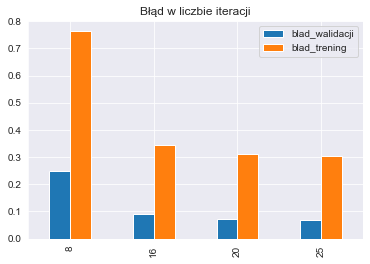

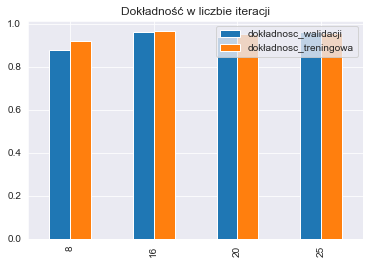

In [25]:
historie_iteracje = {k:[] for k in ['blad_walidacji', 'blad_trening','dokładnosc_walidacji', 'dokładnosc_treningowa']}
testowe_liczby_iteracji = [8,16,20,25]
l_neuronow =  64
for l_iteracji in testowe_liczby_iteracji:
    net1 = Siec()
    net1.dodaj_warstwe(WarstwaFC(25, l_neuronow, AdamOptymalizator()))
    net1.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))

    net1.dodaj_warstwe(WarstwaFC(l_neuronow, l_neuronow,AdamOptymalizator()))
    net1.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))

    net1.dodaj_warstwe(WarstwaFC(l_neuronow, 1, AdamOptymalizator()))
    net1.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))

    bin_cross_entropy = BinaryCrossEntropy()
    net1.ust_f_celu(bin_cross_entropy.funk,bin_cross_entropy.derr)

    historia1 = net1.trenuj(x_train, y_train,
                            iteracje=l_iteracji,
                            lrn_rate=0.01,
                            proc_walidacyjny=0.2,
                            batch_size=32)
    #historie_iteracje.append({k:v[-1] for k,v in  historia1.items()})
    for k in historie_iteracje.keys():
        historie_iteracje[k].append(historia1[k][-1]) #zbieramy dane z ostatniej iteracji
    del net1

data_it = pd.DataFrame(historie_iteracje, index=testowe_liczby_iteracji)
display.display(data_it.head())

data_it.plot(kind = 'bar', y = ['blad_walidacji', 'blad_trening'], title = 'Błąd w liczbie iteracji');
data_it.plot(kind = 'bar', y = ['dokładnosc_walidacji', 'dokładnosc_treningowa'], title = 'Dokładność w liczbie iteracji');


Jak już wspomnieliśmy, wagi sieci neuronowych są aktualizowane iteracyjnie, ponieważ jest to algorytm oparty na gradient descent.
Pojedyncza epoka treningu nie wystarczy i prowadzi do niedopasowania. Biorąc pod uwagę złożoność rzeczywistych problemów, wytrenowanie sieci neuronowej może zająć wiele epok.
W rezultacie spodziewamy się, że wykresy krzywej uczenia będą coraz lepsze, aż do osiągnięcia konwergencji. Następnie, jeśli będziemy dalej trenować model, będzie on nadmiernie dopasowany, a błędy walidacji zaczną się zwiększać.

Patrząc na powyższe wykresy, możemy zauważyć, że dla naszej sieci najgorsze rezultaty odnosi liczba epok równa 8.
Jak pisaliśmy, wynika to z faktu, że jeśli ustawimy zbyt małą liczbę epok, to uczenie zatrzyma się jeszcze przed zbieżnością modelu.

Najlepsze rezulaty zaś są widoczne dla liczby epok równej 20 oraz 25. Dla naszego modelu jest to wystarczająca ilość,
by spełnić kompromis między nauką a generalizacją.

## Przegląd literatury

Co ciekawe, warto zauważyć, że nasze spostrzeżenia dotyczące accuracy modelu w zależności od jego parametrów
co do meritum pokrywają się z obserwacjami zawartymi w artykule *"On Machine Learning Models for Heart Disease Diagnosis"*
[Chu-Hsing Lin, Po-Kai Yang, Yu-Chiao Lin, Pin-Kuei Fu], choć nieco się od niego różnią. We wspomnianej pracy pokazano porównanie modelu NN wśród
różnych wariantów liczby warstw ukrytych: od 1 do 3, a także w różnym zakresie liczby neuronów na warstwę:
mniej niż 20; od 21 do 100, ponad 100. Wyniki zostały przedstawione w poniższej tabeli.

#### *Accuracy of NN on variant numbers of hidden layers and neurons in each layer*

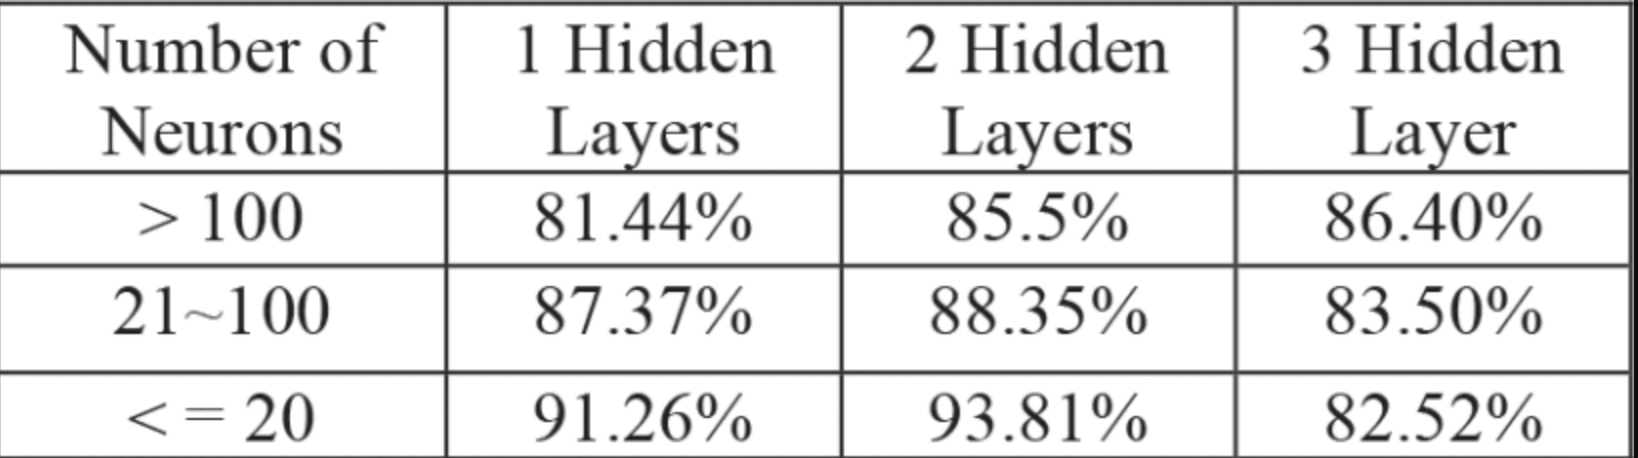

In [26]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/compr2.png")

#### *NN on variant numbers of hidden layers and neurons in each layer*


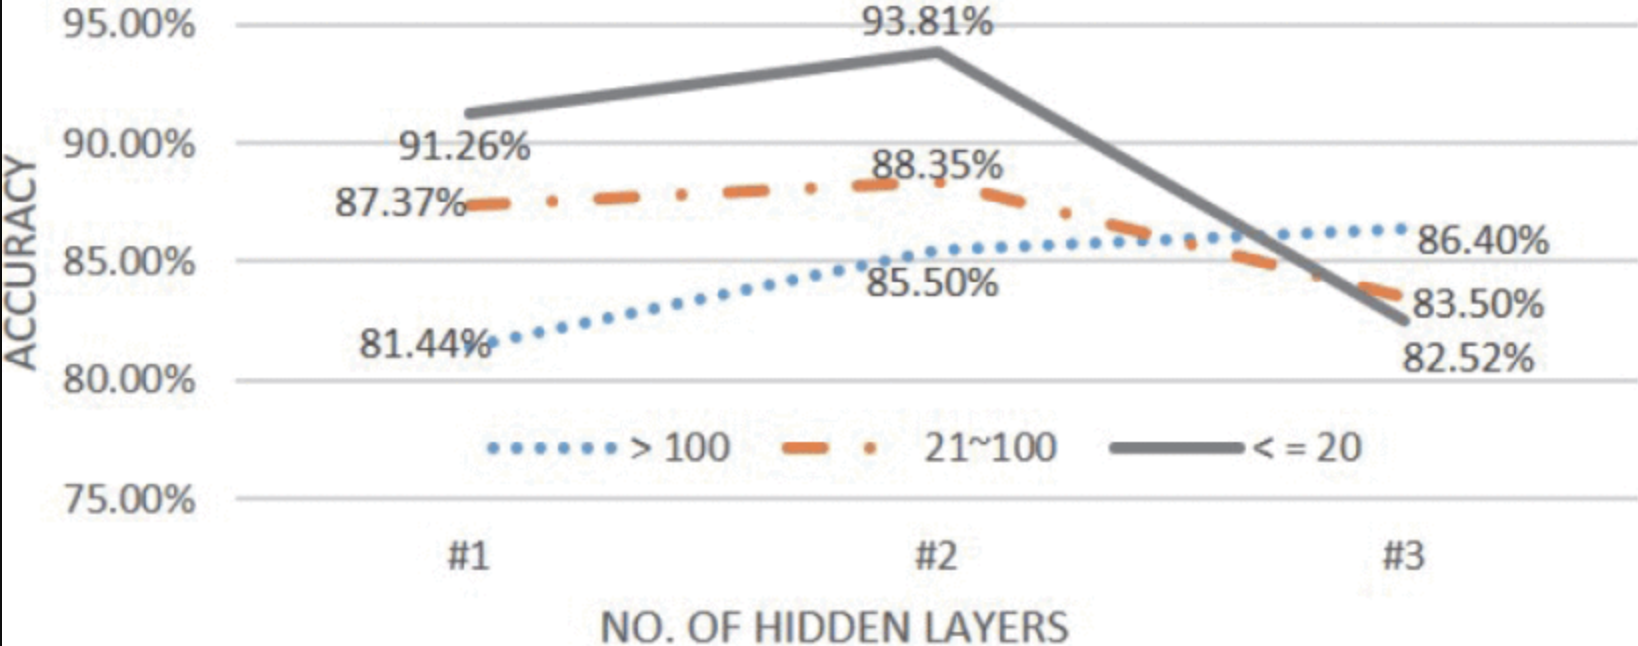

In [27]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/compr1.png")

Mówiąc, że nasze spostrzeżenia zgadzają się "co do meritum", mamy na myśli, że więcej nie zawsze znaczy lepiej.
W przypadku naszych specyficznych parametrów korzystniejsze wyniki odnieśliśmy jednak z użyciem ilości neuronów mniejszej od 100 jednak
większej niż 20 - konkretnie 64 oraz liczby warstw równej 3.

### Inne powiązane artykuły naukowe

Istnieje wiele wcześniejszych prac nad klasyfikacją chorób serca. W jednym z wczesnych badań (1989 r.) accuracy 77,0% zostało
uzyskane przy użyciu algorytmu regresji logistycznej (*"International application of a new probability algorithm for the diagnosis of coronary artery disease"* [R. Detrano et al]).
W tym samym roku, w innym badaniu, w którym autor wykorzystał koncepcyjny system grupowania CLASSIT, wynik trafności wyniósł 78,9%
(*"Models of incremental concept formation"* [J. H. Gennari, P. Langley and D. Fisher, ]. Zaobserwowano również, że accuracy
na poziomie 81,11% i 81,48% można było osiągnąć, stosując odpowiednio algorytmy C4.5 i Naïve Bayes (*"Machine learning techniques for medical analysis. School of Information Technology and Electrical Engineering"*  [N. Cheung] 2001r.).

Jak zatem prezentują się obecnie najlepsze wyniki dla naszego zagadnienia? Poniżej przedstawimy odpowiedź to pytanie.

### Jak moglibyśmy poprawić zdolności predykcyjne naszego modelu - analiza publikacji naukowej

W artykule *"Classification models for heart disease prediction using feature selection and PCA"* [Anna Karen Gárate-Escamila,
AmirHajjam El Hassania, Emmanuel Andrèsbc] zaproponowano model oparty na metodzie chi-kwadrat i PCA do problemu wykrywania chorób serca.
Wyniki eksperymentalne wykazały, że PCA zapewnia lepszą prognozę dotyczącą problemu klasyfikacji wielowymiarowej poprzez dobór cech
metodą chi-kwadrat. Chi-kwadrat klasyfikuje zmienne niezależne najbardziej zgodne z etykietą.
We wspomnianej pracy uzyskane wyniki (za pomocą metody CHI-PCA-RF) wynosiły 99.0% accuracy, 100.0% precyzji.

Biorąc pod uwagę te rezultaty, uważamy, że roztropnym byłoby rozważenie metody analizy głównych składowych przy budowie kolejnych
sieci neuronowych.

## Analizę porównawczą otrzymanych przez nas wyników z innymi metodami

Jak wspomnieliśmy powyżej, zagadnienie wykrywania chorób serca może być - jak większość problemów - rozwiązane na wiele sposobów.

Jednym z nich może być użycie CNN jak w artykule *"On Machine Learning Models for Heart Disease Diagnosis"*
[Chu-Hsing Lin, Po-Kai Yang, Yu-Chiao Lin, Pin-Kuei Fu].

Jak możemy  dowiedzieć się z publikacji, konwolucyjne sieci neuronowe (CNN) mają inną architekturę w porównaniu ze zwykłymi sieciami NN w kilku aspektach.
Neurony w jednej warstwie nie łączą się ze wszystkimi neuronami w warstwie poprzedniej. Ponadto CNN mają dwie części składowe: ekstraktor cech i klasyfikator.
W części ekstraktora cech sieć wykonuje serię operacji splotowych (przez warstwy splotowe) i ograniczeń (przez warstwy łączące), za pomocą których cechy są wykrywane.

Oto jak wyglądają otrzymane przez nich rezultaty:

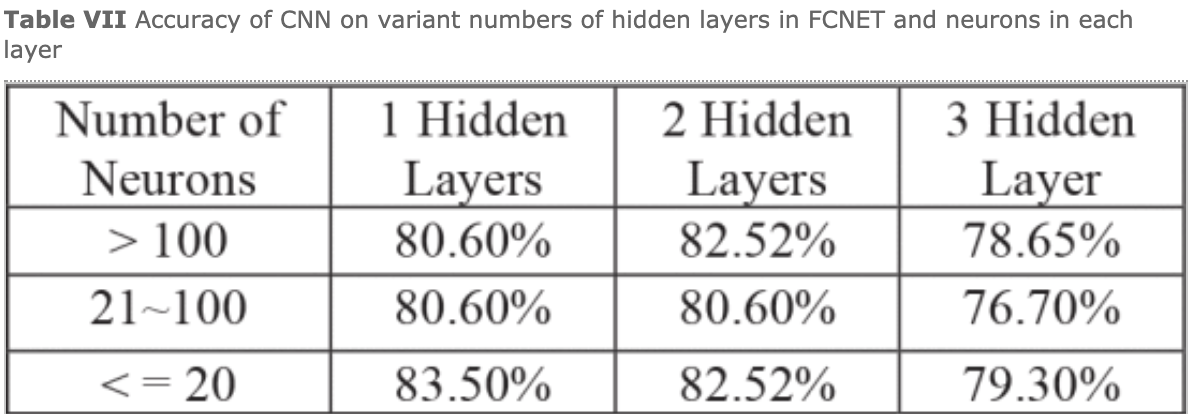

In [28]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/CNN.png")

Jak zauważają sami autorzy dokładność modelu CNN nie jest jednak tak wysoka, jak w konwencjonalnym modelu NN, ale w prawie wszystkich przypadkach algorytm zachowywał
się stabilnie pod względem wydajności. W zagadnieniu wykrywania chorób serca CNN wykazał gorsze wyniki niż sieć z warstwami w pełni połączonymi, a jednym z możliwych powodów,
jest rozmiar zbioru danych, wynoszących 303 rekordy. Jak wspominają autorzy  publikacji, w przyszłości należałoby sprawdzić poprawność modelu dla większej ilości danych.

Warto w tym miejscu również dodać, że CNN jest algorytmem używanym najczęściej do klasyfikacji obrazów. Wyniki accuracy na poziomie 82% są
zatem dla nas zaskakująco dobre, gdyż nie spodziewaliśmy się, że CNN może się sprawdzić w naszym zagadnieniu. Można zatem oczekiwać,
że autorzy publikacji pusługiwali się CNN, w których filtry były jednowymiarowe.

Poniżej przedstawiamy również wyniki uzyskane za pomocą innych metod w artykule
*"Neural network diagnosis of heart disease"* [Ebenezer O. Olaniyi; Oyebade K. Oyedotun; Abdulkader Helwan; Khashman Adnan]

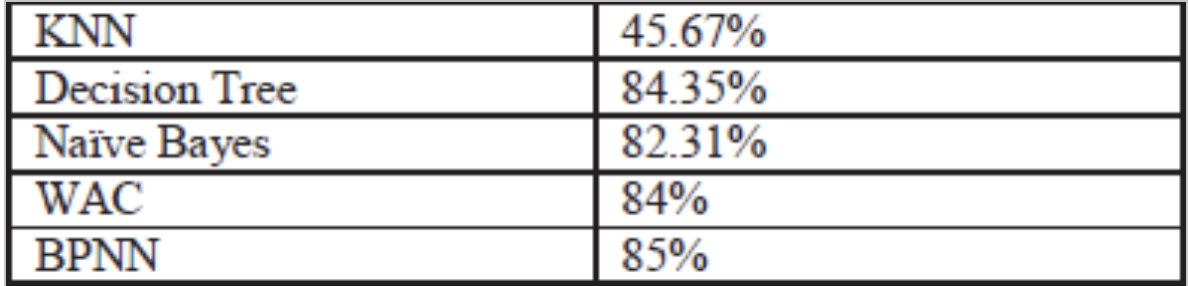

In [29]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/porown.png")

Niestety trudno jest nam odnieść się do metod działania wszystkich algorytmów oraz wyników ich dokładności, gdyż nie mamy
jeszcze wystarczającego doświadczenia w tej dziedzinie. Niemniej jednak stwierdziliśmy, że warto wspomnieć o skuteczności
innych metod, jak i również pokusiliśmy się o samodzielną implementację paru z nich.

Poniżej prezentujemy zatem metody, z którymi spotkaliśmy się do tej pory i uznaliśmy, że również mogą posłużyć do rozwiązania
naszego problemu. Przedstawione poniżej modele zostały stworzone przez nas samodzielnie w programie Statistica:


Krokowa wsteczna:

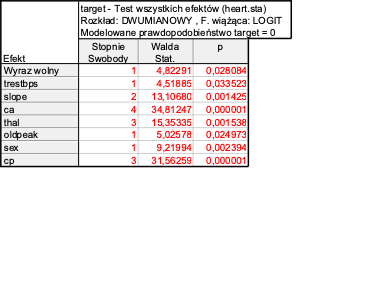

In [30]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/krokowa wsteczna1.png")

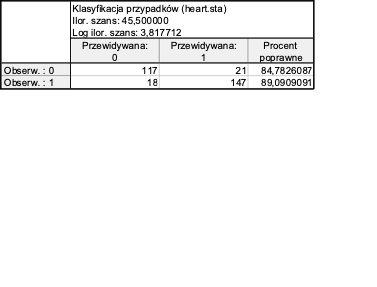

In [31]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/krokowa wsteczna2.png")

Najlepszy podzbiór

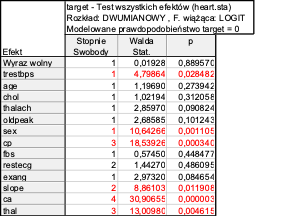

In [32]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/najlepszy podzbior1.png")

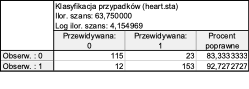

In [33]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/najlepszy podzbior2.png")

Krokowa postępująca

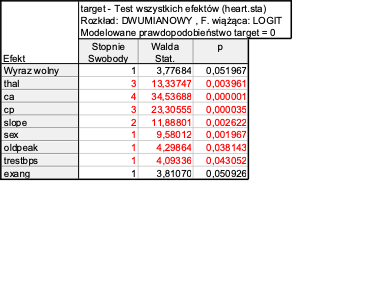

In [34]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/krokowa postepujaca1.png")

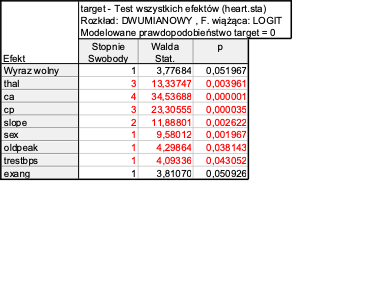

In [35]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/krokowa postepujaca1.png")

Probit – wszystkie efekty

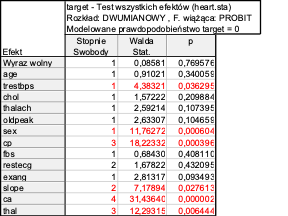

In [36]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/Probit wszystkie efekty1.png")

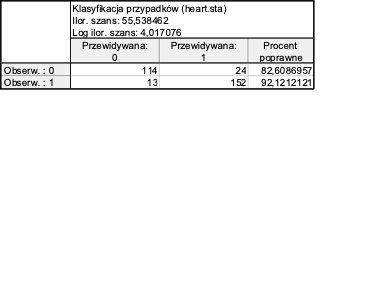

In [37]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/Probit  wszystkie efekty2.png")

Probit – krokowa postępująca

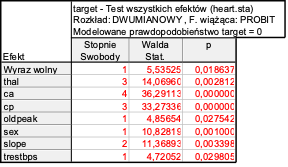

In [38]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/Probit krokowa postępująca1.png")

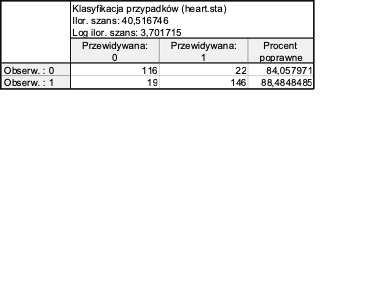

In [39]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/Probit krokowa postępująca2.png")


Probit – krokowa wsteczna

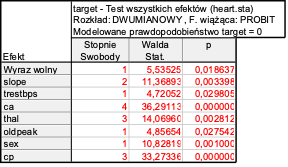

In [40]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/Probit krokowa wsteczna1.png")

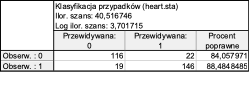

In [41]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/Probit krokowa wsteczna2.png")

Probit – najlepszy podzbiór

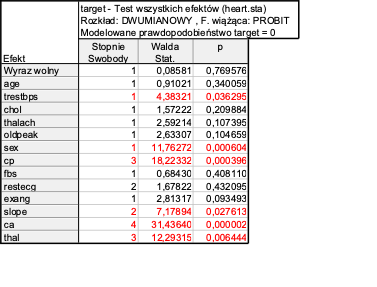

In [42]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/Probit najlepszy podzbiór1.png")

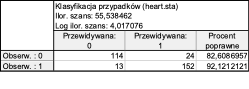

In [43]:
display.Image("/Users/majkamiezianko/PycharmProjects/scientificProject1/pictures/Probit najlepszy podzbiór2.png")

W modelach logistycznym oraz probitowym w naszym zbiorze zmiennych zmienne: age, trestbps, chol, thalach oraz oldpeak były traktowane jako zmienne ilościowe, natomiast pozostałe zmienne jako jakościowe (w koniecznych przypadkach kodowane za pomocą kilku dummies).

Zwróćmy uwagę, że są to modele oszacowane dla całego zbioru danych. Gdybyśmy przeprowadzili tu podział na zbiór uczący i testowy, rozsądnie byłoby przyjąć, że wyniki mogłyby się pogorszyć lub nie pogorszyć, ale na pewno nie poprawić (pomijając przypadek gdybyśmy wiele godzin pracy włożyli w odpowiednią preselekcię zbioru uczącego i testowego, co jednak nie poprawiłoby ogólnych zdolności predykcyjnych modelu i byłoby czystym artefaktem obliczeniowym).

Oszacowaliśmy kilka modeli logistycznych (w oparciu o jedno ze standardowych kryteriów: statystyki punktowej, funkcji największej wiarygodności oraz kryterium Akaike’a) oraz kilka probitowych w klasycznych scenariuszach uwzględniania wszystkich zmiennych, wyboru najlepszego podzbioru zmiennych oraz regresji krokowej postępującej i wstecznej.

Wyniki tych estymacji były podobne. Regularnie nieco trafniej były przewidywane przypadki śmierci (=1) niż przypadki przeżycia (=0), ale tego można było  się spodziewać ze względu na niedoskonałe zrównoważenie próby w zmiennej objaśnianej (54% jedynek).

Można by to próbować korygować doprowadzając do zrównania się trafności dla obu podklas, nie robiliśmy jednak tego, bo wyniki były i tak słabsze niż rezultaty osiągane przez naszą sieć.

Ogólne spostrzeżenia są takie, że w tej klasie modeli modele logitowe były nieco bardziej trafne wobec probitowych. Trafność kształtowała się w przedziale od 83% do 93%. Naturalnie naj bardziej trafne zawsze były modele z pełnym zestawem zmiennych objaśniających (także tych nieistotnych statystycznie na umownym poziomie istotności 0,05).

Realnej trafności na całkowicie zewnętrznych danych intuicyjnie można by oczekiwać zapewne gdzieś w okolicach 80%-85%, czyli nieco poniżej dopasowani modelu tylko ze zmiennymi istotnymi statystycznie.